## Supply Chain and Inventory Data Analytics

### 1. Project Setup and Data Ingestion

In [3]:
# Import necessary libraries
import importlib
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [5]:
# This script is assumed to handle the initial data loading into the database.
import ingestion_db
importlib.reload(ingestion_db)
ingestion_db.load_raw_data()
print("Raw data loaded.")

Raw data loaded.


### 2. Database Overview and Data Profiling

In [8]:
# Creating a connection to the database
conn = sqlite3.connect("SupplyChain.db")

In [10]:
# Get a list of all tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'", conn)

In [12]:
print("--- Database Tables ---")
for table_name in tables['name']:
    print(f"--- {table_name} ---")
    print(f"Total Records: {pd.read_sql(f'SELECT COUNT(*) as Count FROM {table_name}', conn)['Count'].values[0]}")
    display(pd.read_sql(f"SELECT * FROM {table_name} LIMIT 10", conn))

--- Database Tables ---
--- customers ---
Total Records: 20005


,CustomerID,CustomerName,Region,Segment,JoinDate,CustomerType,LoyaltyScore,AvgOrderValue,PreferredCategory,SignupChannel
0,1,Kelly Watts,North America,Retail,2025-08-14,Retail,9.27,681.64,Books,Referral
1,2,Nicholas Olson,Australia,Retail,2024-08-09,Retail,8.61,735.81,Beauty,Mobile App
2,3,Brittany Serrano,Australia,Retail,2024-09-28,Retail,8.28,719.18,Toys,Referral
3,4,Alexandra Michael,Africa,Retail,2025-06-05,Retail,9.58,730.62,Beauty,Referral
4,5,Jon Martin,Asia,Retail,2024-04-08,Retail,9.96,729.73,Health & Wellness,Affiliate
5,6,Gary Ramirez,North America,Retail,2025-01-02,Retail,8.67,744.17,Toys,Mobile App
6,7,Jamie Montoya,Australia,Retail,2024-04-09,Retail,9.06,710.64,Apparel,Mobile App
7,8,Kenneth Miller,South America,Retail,2022-12-27,Retail,9.29,959.22,Home Goods,Website
8,9,William Mcgee,North America,Retail,2024-03-31,Retail,9.01,944.81,Toys,Referral
9,10,Andrew Dunn,Asia,Retail,2022-10-21,Retail,8.96,737.61,Electronics,Affiliate


--- products ---
Total Records: 2000


,ProductID,ProductName,Category,Brand,UnitPrice,CostPrice,VendorID,ProductStatus,LaunchDate,SupplierCategory,WeightVolume
0,1,HarperCollins Sci-Fi Paperback,Books,HarperCollins,30.49,24.38,17.0,Active,2022-06-22,Local,0.57
1,2,Penguin Random House Fiction Novel,Books,Penguin Random House,53.57,31.61,42.0,Active,2024-09-23,International,0.66
2,3,Clorox Glass Cleaner,Household,Clorox,31.78,26.07,39.0,Active,2021-06-21,International,4.74
3,4,Columbia Sleeping Bag,Sports & Outdoors,Columbia,261.04,156.83,30.0,Active,2021-12-04,International,8.33
4,5,Penguin Random House Fantasy Series,Books,Penguin Random House,15.33,13.59,43.0,Active,2021-02-27,Local,0.72
5,6,Fitbit Electric Toothbrush,Health & Wellness,Fitbit,36.28,23.02,5.0,Active,2022-01-23,Local,0.90
6,7,Ashley Furniture Media Console,Furniture,Ashley Furniture,404.29,325.93,34.0,Active,2021-12-06,International,82.21
7,8,Yeti Sleeping Bag,Sports & Outdoors,Yeti,121.39,95.72,9.0,Active,2022-07-14,International,2.96
8,9,Columbia Soft Cooler,Sports & Outdoors,Columbia,230.89,180.84,38.0,Active,2023-08-15,Local,7.40
9,10,Ashley Furniture Sectional Sofa,Furniture,Ashley Furniture,1373.81,883.91,43.0,Active,2021-06-01,Local,69.19


--- shipments ---
Total Records: 20001


,ShipmentID,VendorID,ProductID,Quantity,ShipDate,ActualDeliveryDate,ExpectedDeliveryDate,Status,ShippingMode,CarrierName,DelayReason,DeliveryCost,TrackingID
0,1,457,1320,28,2024-04-23,2024-06-10,2024-05-22,Delayed,Sea,Amazon Logistics,Supplier Delay,26.18,fe3a7b10-c735-488f-8633-4bc880cca1b5
1,2,425,455,63,2024-03-10,2024-03-21,2024-03-18,Delivered,Road,Estes Express Lines,None,157.26,8281f19e-8d15-40e9-a3f7-1a46c7522cf1
2,3,156,724,20,2025-07-14,2025-08-12,2025-08-01,Delayed,Road,Kuehne + Nagel,Supplier Delay,58.18,3b67bae4-ba69-443c-b7b5-9639c5c40224
3,4,31,1060,35,2025-02-20,2025-02-25,2025-02-24,Delivered,Road,J.B. Hunt,None,136.04,cee379b9-da53-4d6c-b6c8-558fa6cccf8c
4,5,255,1976,66,2024-04-02,2024-04-20,2024-04-17,Delivered,Air,XPO Logistics,None,172.18,115001db-8bc6-43f7-be59-1fb3909d95d0
5,6,436,506,23,2025-05-24,2025-06-03,2025-06-01,Delivered,Road,C.H. Robinson,None,140.28,ce1e42da-9cca-42c7-b284-df0c85b88aaf
6,7,262,1647,8,2024-05-21,2024-06-02,2024-06-01,Delivered,Air,C.H. Robinson,None,75.49,d6e8b2d0-d837-4a9b-9cd4-c673844584cd
7,8,161,450,57,2024-01-13,2024-01-24,2024-01-22,Delivered,Road,Estes Express Lines,None,75.48,adb60527-82b8-48af-a30d-c11fbf8a04de
8,9,345,516,97,2024-12-31,2025-01-13,2025-01-14,Delivered,Road,Ryder,None,178.17,382ebfdf-7474-4785-a44c-0c53acf6266c
9,10,214,265,71,2025-08-21,2025-09-05,2025-09-06,Delivered,Road,Deutsche Post,None,24.74,06e96def-62b2-4e0b-9971-eb3976439b1c


--- vendors ---
Total Records: 500


,VendorID,VendorName,LeadTimeDays,ReliabilityScore,Region,VendorType,RatingScore,PaymentTerms,TotalDeliveredQty,TotalReturnedQty
0,1,"Rodriguez, Figueroa and Sanchez",3,98.0,Australia,Primary,4.6,90,24572,16
1,2,Doyle Ltd,3,97.0,Africa,Secondary,4.5,30,23070,23
2,3,"Mcclain, Miller and Henderson",7,96.0,South America,Primary,4.8,30,37856,36
3,4,Davis and Sons,3,98.0,Europe,Primary,4.6,60,33848,31
4,5,"Guzman, Hoffman and Baldwin",5,95.0,Asia,Primary,4.7,90,31763,32
5,6,"Gardner, Robinson and Lawrence",6,97.0,Asia,Secondary,5.0,90,32403,15
6,7,Blake and Sons,7,99.0,Australia,Secondary,4.7,30,26300,14
7,8,"Henderson, Ramirez and Lewis",5,99.0,Asia,Primary,4.9,60,48392,16
8,9,Garcia-James,5,96.0,Australia,Primary,4.7,90,41960,27
9,10,Abbott-Munoz,7,98.0,South America,Primary,4.8,60,28021,20


--- warehouses ---
Total Records: 200


,WarehouseID,Location,Capacity,WarehouseManager,RegionType,AvgDispatchTime,CapacityUsed,TemperatureControlled
0,1,Robertfurt,15139,Natasha Kelley,Rural,2.21,0.93,No
1,2,West Nicoleton,18465,Spencer Green,Urban,1.32,0.91,No
2,3,Martinezview,18603,Amy Harvey,Rural,2.72,0.90,No
3,4,East Josephshire,18292,Eric Acosta,Urban,1.58,0.87,Yes
4,5,Port Tina,15197,Matthew Cabrera,Urban,2.37,0.95,Yes
5,6,Graceville,17549,Daniel Hill,Rural,2.25,0.89,Yes
6,7,Wilcoxville,16801,Jeffrey Wright,Urban,2.69,0.98,No
7,8,West Davidborough,17241,Crystal Clark,Rural,2.56,0.86,Yes
8,9,East Amandaport,18597,Cheryl Jones,Urban,1.99,0.92,No
9,10,Port Suzanneburgh,15664,Kimberly Green,Rural,2.85,0.95,No


--- inventory ---
Total Records: 40001


,InventoryID,ProductID,WarehouseID,StockOnHand,ReorderLevel,SafetyStock,StockAgeDays,AvgMonthlySales,StockStatus,LastPurchasePrice,LastUpdated
0,1,1,1,472,58.0,3,237,6.08,Overstock,175.67,2024-10-14
1,2,1,2,942,54.0,6,333,15.37,Overstock,416.01,2024-12-10
2,3,1,3,343,77.0,3,8,27.85,Overstock,95.43,2025-07-02
3,4,1,4,422,91.0,4,324,8.67,Overstock,78.94,2025-08-18
4,5,1,5,466,51.0,10,305,20.18,Overstock,303.12,2025-05-28
5,6,1,6,565,67.0,7,272,25.18,Overstock,386.91,2025-09-27
6,7,1,7,785,92.0,6,208,9.70,Overstock,485.49,2024-10-07
7,8,1,8,381,89.0,8,199,43.05,Overstock,323.70,2025-05-02
8,9,1,9,977,89.0,3,67,30.78,Overstock,28.32,2024-11-11
9,10,1,10,803,75.0,10,85,34.11,Overstock,84.41,2025-01-29


--- sales ---
Total Records: 200005


,SaleID,Date,ProductID,CustomerID,Quantity,SalesAmount,Discount,WarehouseID,SalesChannel,OrderStatus,ShippingCost,PromoCode,PaymentMethod
0,1,2025-05-19,131,1924,1,29.64,5.43,18,Offline,Completed,25.26,FLASH25,COD
1,2,2024-04-29,53,1340,4,50.72,4.45,20,Offline,Returned,16.21,SUMMER20,COD
2,3,2025-02-26,189,262,3,106.35,25.25,6,Online,Completed,30.22,FREESHIP,COD
3,4,2024-07-29,88,5044,1,1247.07,85.70,17,Online,Completed,9.54,SUMMER20,COD
4,5,2024-08-08,22,18473,3,300000.00,74789.44,111,Offline,Completed,9.31,None,Card
5,6,2024-11-10,17,1112,1,37.03,7.88,16,Online,Completed,39.76,FREESHIP,Card
6,7,2024-09-04,58,1081,5,48.40,0.51,3,Online,Completed,8.28,FREESHIP,Card
7,8,2025-02-15,1274,757,2,94.84,9.63,119,Offline,Completed,42.72,FREESHIP,UPI
8,9,2024-11-13,149,1035,2,856.48,117.15,3,Offline,Completed,29.35,SUMMER20,Card
9,10,2025-06-03,5,674,2,30.66,1.92,14,Offline,Returned,46.41,None,Card


In [14]:
# Create a reports folder
REPORT_PATH = os.path.join(os.getcwd(), 'reports')
os.makedirs(REPORT_PATH, exist_ok=True)

In [16]:
# Profile Single table
def profile_table_db(table_name):
    print(f"\n{'-'*50}\n Profiling Table: {table_name}\n{'-'*50}")

    # Read table from DB
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn)

    # Table Shape
    print(f"Shape: {df.shape}\n")
    
    # Data Types
    display(df.dtypes.to_frame("Data Types"))

    # Missing values
    display(df.isnull().sum().to_frame("Missing Values"))

    # Duplicates
    print(f"Duplicate Rows: {df.duplicated().sum()}\n")

    # Numerical Summary
    display(df.describe())
    
    # Categorical Summary
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"\nColumn: {col}")
        display(df[col].value_counts(dropna=False).to_frame("Count"))

    # Save CSV Report
    summary_df = pd.DataFrame({
        "Columns": df.columns,
        "DataType": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique()
    })
    summary_file = os.path.join(REPORT_PATH, f"{table_name}_profile.csv")
    summary_df.to_csv(summary_file, index=False)
    print(f"\nSaved profiling report CSV: {summary_file}\n")

    return df
        
# Profile all tables
def profile_all_tables(tables_list):
    dfs = {}
    for table_name in tables_list['name']:
        df = profile_table_db(table_name)
        dfs[table_name] = df
    print("Data Profiling completed for all tables!")
    return dfs

# Run profiling for all DB tables
profiled_dataframes = profile_all_tables(tables)


--------------------------------------------------
 Profiling Table: customers
--------------------------------------------------
Shape: (20005, 10)



,Data Types
CustomerID,object
CustomerName,object
Region,object
Segment,object
JoinDate,object
CustomerType,object
LoyaltyScore,float64
AvgOrderValue,float64
PreferredCategory,object
SignupChannel,object


,Missing Values
CustomerID,0
CustomerName,1
Region,1
Segment,0
JoinDate,0
CustomerType,0
LoyaltyScore,0
AvgOrderValue,1
PreferredCategory,0
SignupChannel,0


Duplicate Rows: 5



,LoyaltyScore,AvgOrderValue
count,20005.000000,20004.000000
mean,5.041553,298.751732
std,7.411561,208.330813
min,-5.000000,10.010000
25%,3.180000,133.822500
50%,4.990000,278.120000
75%,6.780000,415.985000
max,1000.000000,999.770000



Column: CustomerID


,Count
CustomerID,
6,2
7,2
8,2
9,2
10,2
...,...
6670,1
6669,1
6668,1



Column: CustomerName


,Count
CustomerName,
David Smith,11
Jennifer Smith,10
Michael Johnson,10
Michael Smith,10
Michael Jones,9
...,...
Pamela Perry,1
Lisa Blake,1
Melanie Hansen,1



Column: Region


,Count
Region,
Australia,3395
South America,3392
Africa,3344
North America,3343
Europe,3305
Asia,3225
None,1



Column: Segment


,Count
Segment,
Retail,16051
Corporate,3954



Column: JoinDate


,Count
JoinDate,
2025-07-19,33
2024-06-23,31
2024-10-21,30
2024-08-26,30
2022-10-21,29
...,...
2023-12-17,8
2024-05-07,8
2025-05-10,8



Column: CustomerType


,Count
CustomerType,
Retail,16051
Corporate,3954



Column: PreferredCategory


,Count
PreferredCategory,
Apparel,1920
Household,1888
Furniture,1847
Beauty,1828
Health & Wellness,1824
Sports & Outdoors,1824
Home Goods,1810
Toys,1807
Grocery,1774



Column: SignupChannel


,Count
SignupChannel,
Website,4079
Affiliate,4063
Referral,3973
Mobile App,3972
In-Store,3918



Saved profiling report CSV: /Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/reports/customers_profile.csv


--------------------------------------------------
 Profiling Table: products
--------------------------------------------------
Shape: (2000, 11)



,Data Types
ProductID,int64
ProductName,object
Category,object
Brand,object
UnitPrice,float64
CostPrice,float64
VendorID,float64
ProductStatus,object
LaunchDate,object
SupplierCategory,object


,Missing Values
ProductID,0
ProductName,1
Category,0
Brand,0
UnitPrice,0
CostPrice,0
VendorID,1
ProductStatus,0
LaunchDate,0
SupplierCategory,0


Duplicate Rows: 0



,ProductID,UnitPrice,CostPrice,VendorID,WeightVolume
count,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000
mean,1000.500000,187.166345,95.398372,227.997499,6.674630
std,577.494589,2240.934660,133.454311,154.833601,16.091051
min,1.000000,-10.000000,2.670000,1.000000,0.100000
25%,500.750000,29.730000,20.207500,83.000000,0.710000
50%,1000.500000,62.620000,43.720000,216.000000,1.600000
75%,1500.250000,158.395000,107.930000,369.500000,4.032500
max,2000.000000,100000.000000,1098.800000,500.000000,98.480000



Column: ProductName


,Count
ProductName,
Ashley Furniture Office Desk,19
HarperCollins Fiction Novel,16
Penguin Random House Historical Fiction,15
HarperCollins Fantasy Series,13
Penguin Random House Fantasy Series,12
...,...
Dell Headphones,1
Sony Portable Power Bank,1
LogiTech Mesh Router,1



Column: Category


,Count
Category,
Household,202
Electronics,197
Home Goods,194
Books,193
Sports & Outdoors,191
Apparel,183
Grocery,173
Toys,171
Beauty,169



Column: Brand


,Count
Brand,
HarperCollins,98
Penguin Random House,95
Ashley Furniture,86
IKEA,77
All-Clad,76
Tide,72
HydroFlask,70
Clorox,70
Yeti,69



Column: ProductStatus


,Count
ProductStatus,
Active,1789
Discontinued,210
inactive,1



Column: LaunchDate


,Count
LaunchDate,
2023-01-15,7
2022-01-27,6
2021-12-06,6
2023-02-15,6
2021-06-01,6
...,...
2022-09-09,1
2024-07-22,1
2023-03-24,1



Column: SupplierCategory


,Count
SupplierCategory,
Local,1198
International,801
Internationl,1



Saved profiling report CSV: /Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/reports/products_profile.csv


--------------------------------------------------
 Profiling Table: shipments
--------------------------------------------------
Shape: (20001, 13)



,Data Types
ShipmentID,int64
VendorID,int64
ProductID,int64
Quantity,int64
ShipDate,object
ActualDeliveryDate,object
ExpectedDeliveryDate,object
Status,object
ShippingMode,object
CarrierName,object


,Missing Values
ShipmentID,0
VendorID,0
ProductID,0
Quantity,0
ShipDate,0
ActualDeliveryDate,1022
ExpectedDeliveryDate,0
Status,0
ShippingMode,0
CarrierName,0


Duplicate Rows: 1



,ShipmentID,VendorID,ProductID,Quantity,DeliveryCost
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000
mean,10000.002550,250.603020,1001.680566,50.667617,102.281544
std,5773.931298,143.990227,579.180068,28.801676,56.366908
min,1.000000,1.000000,1.000000,1.000000,-20.000000
25%,5000.000000,127.000000,495.000000,26.000000,53.220000
50%,10000.000000,252.000000,1015.000000,51.000000,102.260000
75%,15000.000000,374.000000,1501.000000,76.000000,151.260000
max,20000.000000,500.000000,2000.000000,100.000000,200.000000



Column: ShipDate


,Count
ShipDate,
2025-03-16,43
2024-08-18,42
2024-01-24,41
2024-04-30,41
2024-08-17,40
...,...
2025-02-15,16
2025-01-01,15
2023-12-19,14



Column: ActualDeliveryDate


,Count
ActualDeliveryDate,
None,1022
2023-12-17,45
2023-11-25,44
2025-09-28,40
2024-04-08,40
...,...
2023-10-05,1
2025-11-03,1
2025-11-06,1



Column: ExpectedDeliveryDate


,Count
ExpectedDeliveryDate,
2024-01-31,47
2024-04-07,45
2025-08-29,44
2024-12-12,43
2023-12-14,43
...,...
2025-10-26,1
2025-10-29,1
2025-10-28,1



Column: Status


,Count
Status,
Delivered,16875
Delayed,2104
Pending,1021
pending,1



Column: ShippingMode


,Count
ShippingMode,
Road,6686
Sea,6667
Air,6648



Column: CarrierName


,Count
CarrierName,
XPO Logistics,1071
Ryder,1061
Panalpina,1052
Old Dominion Freight Line,1023
UPS,1016
Kuehne + Nagel,1012
DHL,1005
Estes Express Lines,1000
FedEx,999



Column: DelayReason


,Count
DelayReason,
None,17897
Supplier Delay,453
Missing Documentation,424
Weather,421
Logistics Issue,416
Customs,390



Column: TrackingID


,Count
TrackingID,
65c64714-1e3d-45a9-92a5-ec0d18141f46,2
fe3a7b10-c735-488f-8633-4bc880cca1b5,1
13b4963b-eeb4-4204-9aa6-10360df9eda3,1
83661c99-c0c5-4852-8520-f5c1c142d884,1
b7f8b09f-8039-48dc-a27e-4d70c9e896e3,1
...,...
91886e56-37e9-4735-bba5-fa30f5a04eb3,1
a5d4ad30-3c87-4bc2-a4e4-61263c284218,1
c940b0be-11f6-4fba-95bb-e176f0cf1751,1



Saved profiling report CSV: /Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/reports/shipments_profile.csv


--------------------------------------------------
 Profiling Table: vendors
--------------------------------------------------
Shape: (500, 10)



,Data Types
VendorID,int64
VendorName,object
LeadTimeDays,int64
ReliabilityScore,float64
Region,object
VendorType,object
RatingScore,float64
PaymentTerms,int64
TotalDeliveredQty,int64
TotalReturnedQty,int64


,Missing Values
VendorID,0
VendorName,3
LeadTimeDays,0
ReliabilityScore,2
Region,0
VendorType,0
RatingScore,0
PaymentTerms,0
TotalDeliveredQty,0
TotalReturnedQty,0


Duplicate Rows: 0



,VendorID,LeadTimeDays,ReliabilityScore,RatingScore,PaymentTerms,TotalDeliveredQty,TotalReturnedQty
count,500.000000,500.00000,498.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,13.67400,84.592369,3.752800,61.920000,13777.410000,143.084000
std,144.481833,5.83299,8.289317,0.787638,24.688715,8756.122293,91.155491
min,1.000000,-5.00000,61.000000,2.000000,30.000000,1082.000000,10.000000
25%,125.750000,10.00000,80.000000,3.400000,30.000000,7681.500000,82.750000
50%,250.500000,13.00000,85.000000,3.800000,60.000000,12759.000000,136.000000
75%,375.250000,17.00000,91.000000,4.100000,90.000000,17011.500000,173.000000
max,500.000000,30.00000,99.000000,15.000000,90.000000,49758.000000,498.000000



Column: VendorName


,Count
VendorName,
None,3
"Rodriguez, Figueroa and Sanchez",1
Torres Group,1
Zhang PLC,1
"Harper, Smith and Buchanan",1
...,...
Medina-Navarro,1
Castaneda-Ashley,1
Smith-Bell,1



Column: Region


,Count
Region,
Australia,99
South America,92
Europe,87
North America,86
Asia,69
Africa,66
asia,1



Column: VendorType


,Count
VendorType,
Primary,351
Secondary,149



Saved profiling report CSV: /Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/reports/vendors_profile.csv


--------------------------------------------------
 Profiling Table: warehouses
--------------------------------------------------
Shape: (200, 8)



,Data Types
WarehouseID,int64
Location,object
Capacity,int64
WarehouseManager,object
RegionType,object
AvgDispatchTime,float64
CapacityUsed,float64
TemperatureControlled,object


,Missing Values
WarehouseID,0
Location,0
Capacity,0
WarehouseManager,0
RegionType,0
AvgDispatchTime,0
CapacityUsed,0
TemperatureControlled,0


Duplicate Rows: 0



,WarehouseID,Capacity,AvgDispatchTime,CapacityUsed
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,10805.685000,5.860900,0.657450
std,57.879185,3435.886514,2.349845,0.162777
min,1.000000,5010.000000,-1.000000,-0.100000
25%,50.750000,7772.500000,3.872500,0.550000
50%,100.500000,10744.500000,5.940000,0.660000
75%,150.250000,13082.500000,7.862500,0.772500
max,200.000000,19838.000000,9.970000,1.500000



Column: Location


,Count
Location,
Robertfurt,1
West Jonathan,1
Kristenshire,1
North Danaburgh,1
Port Michael,1
...,...
Port Thomas,1
Wolfbury,1
Cynthiaton,1



Column: WarehouseManager


,Count
WarehouseManager,
Natasha Kelley,1
Ashley French,1
David Hudson,1
Patrick Gibson,1
Lisa Marquez,1
...,...
Jason Gates,1
Renee Park,1
Joshua Gray,1



Column: RegionType


,Count
RegionType,
Urban,117
Rural,83



Column: TemperatureControlled


,Count
TemperatureControlled,
No,109
Yes,90
yEs,1



Saved profiling report CSV: /Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/reports/warehouses_profile.csv


--------------------------------------------------
 Profiling Table: inventory
--------------------------------------------------
Shape: (40001, 11)



,Data Types
InventoryID,int64
ProductID,int64
WarehouseID,int64
StockOnHand,int64
ReorderLevel,float64
SafetyStock,int64
StockAgeDays,int64
AvgMonthlySales,float64
StockStatus,object
LastPurchasePrice,float64


,Missing Values
InventoryID,0
ProductID,0
WarehouseID,0
StockOnHand,0
ReorderLevel,1
SafetyStock,0
StockAgeDays,0
AvgMonthlySales,0
StockStatus,0
LastPurchasePrice,0


Duplicate Rows: 0



,InventoryID,ProductID,WarehouseID,StockOnHand,ReorderLevel,SafetyStock,StockAgeDays,AvgMonthlySales,LastPurchasePrice
count,40001.000000,40001.000000,40001.000000,40001.000000,40000.000000,40001.000000,40001.000000,40001.000000,40001.000000
mean,20001.000000,921.626359,92.351941,326.172021,22.087325,5.499213,182.302267,27.413953,252.793234
std,11547.438396,606.983112,60.709022,216.934052,26.116051,2.872213,104.848410,12.952748,143.599101
min,1.000000,1.000000,1.000000,-10.000000,1.000000,1.000000,-5.000000,-1.000000,5.000000
25%,10001.000000,357.000000,36.000000,160.000000,7.000000,3.000000,92.000000,16.210000,128.900000
50%,20001.000000,905.000000,91.000000,308.000000,13.000000,5.000000,182.000000,27.450000,251.830000
75%,30001.000000,1450.000000,145.000000,438.000000,19.000000,8.000000,273.000000,38.600000,378.090000
max,40001.000000,2000.000000,200.000000,1000.000000,100.000000,10.000000,365.000000,50.000000,500.000000



Column: StockStatus


,Count
StockStatus,
Overstock,36443
OK,3380
Low,177
stock_low,1



Column: LastUpdated


,Count
LastUpdated,
2024-11-30,149
2025-02-07,143
2025-01-11,140
2025-03-28,136
2025-01-20,133
...,...
2025-03-18,89
2024-10-08,88
2025-04-27,86



Saved profiling report CSV: /Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/reports/inventory_profile.csv


--------------------------------------------------
 Profiling Table: sales
--------------------------------------------------
Shape: (200005, 13)



,Data Types
SaleID,int64
Date,object
ProductID,int64
CustomerID,int64
Quantity,int64
SalesAmount,float64
Discount,float64
WarehouseID,int64
SalesChannel,object
OrderStatus,object


,Missing Values
SaleID,0
Date,0
ProductID,0
CustomerID,0
Quantity,0
SalesAmount,1
Discount,0
WarehouseID,0
SalesChannel,0
OrderStatus,0


Duplicate Rows: 5



,SaleID,ProductID,CustomerID,Quantity,SalesAmount,Discount,WarehouseID,ShippingCost
count,200005.000000,200005.000000,200005.000000,200005.000000,200004.000000,200005.000000,200005.000000,200005.000000
mean,99998.050124,190.961076,1907.514262,3.005780,1917.019158,244.138279,28.472968,27.482504
std,57736.528687,330.461837,3313.967056,1.411877,21748.520323,3218.433638,44.525722,12.989546
min,1.000000,1.000000,1.000000,-10.000000,-50.000000,-12.450000,1.000000,-5.000000
25%,49997.000000,56.000000,553.000000,2.000000,94.820000,7.730000,7.000000,16.240000
50%,99998.000000,110.000000,1104.000000,3.000000,222.180000,23.280000,13.000000,27.490000
75%,149999.000000,166.000000,1651.000000,4.000000,610.965000,71.020000,19.000000,38.740000
max,200000.000000,2000.000000,20000.000000,5.000000,500000.000000,124764.090000,200.000000,50.000000



Column: Date


,Count
Date,
2024-05-29,326
2025-04-02,323
2024-05-01,323
2025-07-28,319
2025-08-15,317
...,...
2024-08-01,230
2023-12-13,229
2025-06-16,227



Column: SalesChannel


,Count
SalesChannel,
Online,100370
Offline,99634
websitE,1



Column: OrderStatus


,Count
OrderStatus,
Completed,184341
Returned,11857
Cancelled,3806
Returned,1



Column: PromoCode


,Count
PromoCode,
None,40351
FLASH25,39971
SUMMER20,39943
SAVE15,39939
FREESHIP,39801



Column: PaymentMethod


,Count
PaymentMethod,
Card,67020
UPI,66739
COD,66246



Saved profiling report CSV: /Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/reports/sales_profile.csv

Data Profiling completed for all tables!


### 3. Data Cleaning and Validation

In [19]:
# Import the data cleaning script and ensure it is reloaded
import data_cleaning
importlib.reload(data_cleaning)

<module 'data_cleaning' from '/Users/sumersingh/Desktop/Supply Chain & Inventory data Analytics/data_cleaning.py'>

In [21]:
# Run the cleaning function. This will write cleaned data to new tables.
cleaned_data = data_cleaning.clean_all_tables()

Starting data cleaning process...
Cleaning Table: customers...
Completed cleaning: customers, Shape: (19995, 10)

Cleaning Table: products...
Completed cleaning: products, Shape: (2000, 11)

Cleaning Table: shipments...
Completed cleaning: shipments, Shape: (20000, 14)

Cleaning Table: vendors...
Completed cleaning: vendors, Shape: (500, 10)

Cleaning Table: warehouses...
Completed cleaning: warehouses, Shape: (200, 8)

Cleaning Table: inventory...
Completed cleaning: inventory, Shape: (40000, 11)

Cleaning Table: sales...
Completed cleaning: sales, Shape: (200000, 13)

All tables cleaned successfully!


In [33]:
# Read the cleaned Sales data for validation
try:
    sales_df = cleaned_data['sales']
    print("Successfully read cleaned Sales data.")
    print("\nFirst 5 rows of cleaned Sales data:")
    display(sales_df.head())
except Exception as e:
    print(f"Error reading cleaned Sales data: {e}")

Successfully read cleaned Sales data.

First 5 rows of cleaned Sales data:


,SaleID,Date,ProductID,CustomerID,Quantity,SalesAmount,Discount,WarehouseID,SalesChannel,OrderStatus,ShippingCost,PromoCode,PaymentMethod
0,1,2025-05-19,131,1924,1,29.64,5.43,18,Offline,Completed,25.26,FLASH25,COD
1,2,2024-04-29,53,1340,4,50.72,4.45,20,Offline,Returned,16.21,SUMMER20,COD
2,3,2025-02-26,189,262,3,106.35,25.25,6,Online,Completed,30.22,FREESHIP,COD
3,4,2024-07-29,88,5044,1,1247.07,85.70,17,Online,Completed,9.54,SUMMER20,COD
4,5,2024-08-08,22,18473,3,300000.00,74789.44,111,Offline,Completed,9.31,None,Card


In [35]:
# Read the cleaned Products data for validation
try:
    products_df = cleaned_data['products']
    print("Successfully read cleaned Products data.")
    print("\nFirst 5 rows of cleaned Products data:")
    display(products_df.head())
except Exception as e:
    print(f"Error reading cleaned Products data: {e}")

Successfully read cleaned Products data.

First 5 rows of cleaned Products data:


,ProductID,ProductName,Category,Brand,UnitPrice,CostPrice,VendorID,ProductStatus,LaunchDate,SupplierCategory,WeightVolume
0,1,HarperCollins Sci-Fi Paperback,Books,HarperCollins,30.49,24.38,17,Active,2022-06-22,Local,0.57
1,2,Penguin Random House Fiction Novel,Books,Penguin Random House,53.57,31.61,42,Active,2024-09-23,International,0.66
2,3,Clorox Glass Cleaner,Household,Clorox,31.78,26.07,39,Active,2021-06-21,International,4.74
3,4,Columbia Sleeping Bag,Sports & Outdoors,Columbia,261.04,156.83,30,Active,2021-12-04,International,8.33
4,5,Penguin Random House Fantasy Series,Books,Penguin Random House,15.33,13.59,43,Active,2021-02-27,Local,0.72


In [37]:
# Read the cleaned Vendors data for validation
try:
    vendors_df = cleaned_data['vendors']
    print("Successfully read cleaned Vandors data.")
    print("\nFirst 5 rows of cleaned Vandors data:")
    display(vendors_df.head())
except Exception as e:
    print(f"Error reading cleaned Vandors data: {e}")

Successfully read cleaned Vandors data.

First 5 rows of cleaned Vandors data:


,VendorID,VendorName,LeadTimeDays,ReliabilityScore,Region,VendorType,RatingScore,PaymentTerms,TotalDeliveredQty,TotalReturnedQty
0,1,"Rodriguez, Figueroa And Sanchez",3,98.0,Australia,Primary,4.6,90,24572,16
1,2,Doyle Ltd,3,97.0,Africa,Secondary,4.5,30,23070,23
2,3,"Mcclain, Miller And Henderson",7,96.0,South America,Primary,4.8,30,37856,36
3,4,Davis And Sons,3,98.0,Europe,Primary,4.6,60,33848,31
4,5,"Guzman, Hoffman And Baldwin",5,95.0,Asia,Primary,4.7,90,31763,32


In [39]:
# Read the cleaned Warehouses data for validation
try:
    warehouses_df = cleaned_data['warehouses']
    print("Successfully read cleaned Warehouses data.")
    print("\nFirst 5 rows of cleaned Warehouses data:")
    display(warehouses_df.head())
except Exception as e:
    print(f"Error reading cleaned Warehouses data: {e}")

Successfully read cleaned Warehouses data.

First 5 rows of cleaned Warehouses data:


,WarehouseID,Location,Capacity,WarehouseManager,RegionType,AvgDispatchTime,CapacityUsed,TemperatureControlled
0,1,Robertfurt,15139,Natasha Kelley,Rural,2.21,0.93,No
1,2,West Nicoleton,18465,Spencer Green,Urban,1.32,0.91,No
2,3,Martinezview,18603,Amy Harvey,Rural,2.72,0.90,No
3,4,East Josephshire,18292,Eric Acosta,Urban,1.58,0.87,Yes
4,5,Port Tina,15197,Matthew Cabrera,Urban,2.37,0.95,Yes


In [41]:
# Read the cleaned Inventory data for validation
try:
    inventory_df = cleaned_data['inventory']
    print("Successfully read cleaned Inventory data.")
    print("\nFirst 5 rows of cleaned Inventory data:")
    display(inventory_df.head())
except Exception as e:
    print(f"Error reading cleaned Inventory data: {e}")

Successfully read cleaned Inventory data.

First 5 rows of cleaned Inventory data:


,InventoryID,ProductID,WarehouseID,StockOnHand,ReorderLevel,SafetyStock,StockAgeDays,AvgMonthlySales,StockStatus,LastPurchasePrice,LastUpdated
0,1,1,1,472,58.0,3,237,6.08,Overstock,175.67,2024-10-14
1,2,1,2,942,54.0,6,333,15.37,Overstock,416.01,2024-12-10
2,3,1,3,343,77.0,3,8,27.85,Overstock,95.43,2025-07-02
3,4,1,4,422,91.0,4,324,8.67,Overstock,78.94,2025-08-18
4,5,1,5,466,51.0,10,305,20.18,Overstock,303.12,2025-05-28


In [43]:
# Read the cleaned Customers data for validation
try:
    customers_df = cleaned_data['customers']
    print("Successfully read cleaned Customers data.")
    print("\nFirst 5 rows of cleaned Customers data:")
    display(customers_df.head())
except Exception as e:
    print(f"Error reading cleaned Customers data: {e}")

Successfully read cleaned Customers data.

First 5 rows of cleaned Customers data:


,CustomerID,CustomerName,Region,Segment,JoinDate,CustomerType,LoyaltyScore,AvgOrderValue,PreferredCategory,SignupChannel
0,1.0,Kelly Watts,North America,Retail,2025-08-14,Retail,9.27,681.64,Books,Referral
1,2.0,Nicholas Olson,Australia,Retail,2024-08-09,Retail,8.61,735.81,Beauty,Mobile App
2,3.0,Brittany Serrano,Australia,Retail,2024-09-28,Retail,8.28,719.18,Toys,Referral
3,4.0,Alexandra Michael,Africa,Retail,2025-06-05,Retail,9.58,730.62,Beauty,Referral
4,5.0,Jon Martin,Asia,Retail,2024-04-08,Retail,9.96,729.73,Health & Wellness,Affiliate


In [45]:
# Read the cleaned Shipments data for validation
try:
    shipments_df = cleaned_data['shipments']
    print("Successfully read cleaned Shipments data.")
    print("\nFirst 5 rows of cleaned Shipments data:")
    display(shipments_df.head())
except Exception as e:
    print(f"Error reading cleaned Shipments data: {e}")

Successfully read cleaned Shipments data.

First 5 rows of cleaned Shipments data:


,ShipmentID,VendorID,ProductID,Quantity,ShipDate,ActualDeliveryDate,ExpectedDeliveryDate,Status,ShippingMode,CarrierName,DelayReason,DeliveryCost,TrackingID,DelayDays
0,1,457,1320,28,2024-04-23,2024-06-10,2024-05-22,Delayed,Sea,Amazon Logistics,Supplier Delay,26.18,fe3a7b10-c735-488f-8633-4bc880cca1b5,48
1,2,425,455,63,2024-03-10,2024-03-21,2024-03-18,Delivered,Road,Estes Express Lines,None,157.26,8281f19e-8d15-40e9-a3f7-1a46c7522cf1,11
2,3,156,724,20,2025-07-14,2025-08-12,2025-08-01,Delayed,Road,Kuehne + Nagel,Supplier Delay,58.18,3b67bae4-ba69-443c-b7b5-9639c5c40224,29
3,4,31,1060,35,2025-02-20,2025-02-25,2025-02-24,Delivered,Road,J.B. Hunt,None,136.04,cee379b9-da53-4d6c-b6c8-558fa6cccf8c,5
4,5,255,1976,66,2024-04-02,2024-04-20,2024-04-17,Delivered,Air,XPO Logistics,None,172.18,115001db-8bc6-43f7-be59-1fb3909d95d0,18


In [49]:
sales_df['CustomerID'] = sales_df['CustomerID'].astype(str).str.extract('(\d+)')
sales_df['CustomerID'] = sales_df['CustomerID'].astype(int)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   SaleID         200000 non-null  int64         
 1   Date           200000 non-null  datetime64[ns]
 2   ProductID      200000 non-null  int64         
 3   CustomerID     200000 non-null  int64         
 4   Quantity       200000 non-null  int64         
 5   SalesAmount    200000 non-null  float64       
 6   Discount       200000 non-null  float64       
 7   WarehouseID    200000 non-null  int64         
 8   SalesChannel   200000 non-null  object        
 9   OrderStatus    200000 non-null  object        
 10  ShippingCost   200000 non-null  float64       
 11  PromoCode      159650 non-null  object        
 12  PaymentMethod  200000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 21.4+ MB


In [51]:
sales_df.isnull().sum()

SaleID               0
Date                 0
ProductID            0
CustomerID           0
Quantity             0
SalesAmount          0
Discount             0
WarehouseID          0
SalesChannel         0
OrderStatus          0
ShippingCost         0
PromoCode        40350
PaymentMethod        0
dtype: int64

In [53]:
sales_df.duplicated().sum()

0

In [55]:
sales_df.describe()

,SaleID,Date,ProductID,CustomerID,Quantity,SalesAmount,Discount,WarehouseID,ShippingCost
count,200000.000000,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,2024-09-30 10:10:37.056000,190.963840,1907.523935,3.005815,1917.159268,244.138748,28.472875,27.482467
min,1.000000,2023-10-02 00:00:00,1.000000,1.000000,0.000000,0.000000,-12.450000,1.000000,0.000000
25%,50000.750000,2024-04-01 00:00:00,56.000000,553.000000,2.000000,94.820000,7.730000,7.000000,16.240000
50%,100000.500000,2024-09-30 00:00:00,110.000000,1104.000000,3.000000,222.180000,23.280000,13.000000,27.490000
75%,150000.250000,2025-04-01 00:00:00,166.000000,1651.000000,4.000000,610.900000,71.020000,19.000000,38.740000
max,200000.000000,2025-10-01 00:00:00,2000.000000,20000.000000,5.000000,500000.000000,124764.090000,200.000000,50.000000
std,57735.171256,NaN,330.465415,3314.006116,1.411588,21748.725339,3218.473398,44.525829,12.989314


In [57]:
sales_df.shape

(200000, 13)

## 4. Derived Tables from Source Tables

#### 1. Sales and Revenue Table

In [62]:
#4. Derived the required table from cleaned data and stored them in database again
#1. Sales and Revenue Analysis Table

sales_revenue_fact = sales_df.merge(
    products_df[['ProductID', 'ProductName', 'Category', 'Brand', 'CostPrice']],
    on = 'ProductID',
    how = 'left'
)

sales_revenue_fact = sales_revenue_fact.merge(
    customers_df[['CustomerID', 'CustomerName', 'Segment', 'Region']],
    on = 'CustomerID',
    how = 'left'
)

sales_revenue_fact = sales_revenue_fact.merge(
    warehouses_df[['WarehouseID', 'Location', 'RegionType']],
    on = 'WarehouseID',
    how = 'left'
)

In [64]:
sales_revenue_fact.head()

,SaleID,Date,ProductID,CustomerID,Quantity,SalesAmount,Discount,WarehouseID,SalesChannel,OrderStatus,...,PaymentMethod,ProductName,Category,Brand,CostPrice,CustomerName,Segment,Region,Location,RegionType
0,1,2025-05-19,131,1924,1,29.64,5.43,18,Offline,Completed,...,COD,Penguin Random House Historical Fiction,Books,Penguin Random House,25.04,Alison Guzman,Retail,North America,New Kayla,Urban
1,2,2024-04-29,53,1340,4,50.72,4.45,20,Offline,Returned,...,COD,Clorox Dish Soap,Household,Clorox,9.89,Daniel Walker,Retail,Africa,Murphyhaven,Urban
2,3,2025-02-26,189,262,3,106.35,25.25,6,Online,Completed,...,COD,Swiffer Floor Cleaner,Household,Swiffer,23.39,Amber Walker,Retail,North America,Graceville,Rural
3,4,2024-07-29,88,5044,1,1247.07,85.70,17,Online,Completed,...,COD,IKEA Sectional Sofa,Furniture,IKEA,825.63,Brittany White,Retail,Europe,Priceport,Rural
4,5,2024-08-08,22,18473,3,300000.00,74789.44,111,Offline,Completed,...,Card,Vitamix Cordless Vacuum,Home Goods,Vitamix,43.98,Kim Taylor,Retail,Africa,New Carrieport,Urban


In [66]:
sales_revenue_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   SaleID         200000 non-null  int64         
 1   Date           200000 non-null  datetime64[ns]
 2   ProductID      200000 non-null  int64         
 3   CustomerID     200000 non-null  int64         
 4   Quantity       200000 non-null  int64         
 5   SalesAmount    200000 non-null  float64       
 6   Discount       200000 non-null  float64       
 7   WarehouseID    200000 non-null  int64         
 8   SalesChannel   200000 non-null  object        
 9   OrderStatus    200000 non-null  object        
 10  ShippingCost   200000 non-null  float64       
 11  PromoCode      159650 non-null  object        
 12  PaymentMethod  200000 non-null  object        
 13  ProductName    199050 non-null  object        
 14  Category       199050 non-null  object        
 15  

In [68]:
sales_revenue_fact.describe()

,SaleID,Date,ProductID,CustomerID,Quantity,SalesAmount,Discount,WarehouseID,ShippingCost,CostPrice
count,200000.000000,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199050.000000
mean,100000.500000,2024-09-30 10:10:37.056000,190.963840,1907.523935,3.005815,1917.159268,244.138748,28.472875,27.482467,143.189447
min,1.000000,2023-10-02 00:00:00,1.000000,1.000000,0.000000,0.000000,-12.450000,1.000000,0.000000,2.670000
25%,50000.750000,2024-04-01 00:00:00,56.000000,553.000000,2.000000,94.820000,7.730000,7.000000,16.240000,26.070000
50%,100000.500000,2024-09-30 00:00:00,110.000000,1104.000000,3.000000,222.180000,23.280000,13.000000,27.490000,57.670000
75%,150000.250000,2025-04-01 00:00:00,166.000000,1651.000000,4.000000,610.900000,71.020000,19.000000,38.740000,134.936000
max,200000.000000,2025-10-01 00:00:00,2000.000000,20000.000000,5.000000,500000.000000,124764.090000,200.000000,50.000000,1098.800000
std,57735.171256,NaN,330.465415,3314.006116,1.411588,21748.725339,3218.473398,44.525829,12.989314,206.787075


In [70]:
sales_revenue_fact.shape

(200000, 22)

In [72]:
sales_revenue_fact.isnull().sum()

SaleID               0
Date                 0
ProductID            0
CustomerID           0
Quantity             0
SalesAmount          0
Discount             0
WarehouseID          0
SalesChannel         0
OrderStatus          0
ShippingCost         0
PromoCode        40350
PaymentMethod        0
ProductName        950
Category           950
Brand              950
CostPrice          950
CustomerName       551
Segment            551
Region             551
Location             0
RegionType           0
dtype: int64

In [74]:
sales_revenue_fact.duplicated().sum()

0

In [76]:
sales_revenue_fact.dropna(subset = ['CustomerName', 'Segment', 'Region', 'ProductName'], inplace = True)

In [78]:
sales_revenue_fact.isnull().sum()

SaleID               0
Date                 0
ProductID            0
CustomerID           0
Quantity             0
SalesAmount          0
Discount             0
WarehouseID          0
SalesChannel         0
OrderStatus          0
ShippingCost         0
PromoCode        40045
PaymentMethod        0
ProductName          0
Category             0
Brand                0
CostPrice            0
CustomerName         0
Segment              0
Region               0
Location             0
RegionType           0
dtype: int64

In [80]:
sales_revenue_fact.head()

,SaleID,Date,ProductID,CustomerID,Quantity,SalesAmount,Discount,WarehouseID,SalesChannel,OrderStatus,...,PaymentMethod,ProductName,Category,Brand,CostPrice,CustomerName,Segment,Region,Location,RegionType
0,1,2025-05-19,131,1924,1,29.64,5.43,18,Offline,Completed,...,COD,Penguin Random House Historical Fiction,Books,Penguin Random House,25.04,Alison Guzman,Retail,North America,New Kayla,Urban
1,2,2024-04-29,53,1340,4,50.72,4.45,20,Offline,Returned,...,COD,Clorox Dish Soap,Household,Clorox,9.89,Daniel Walker,Retail,Africa,Murphyhaven,Urban
2,3,2025-02-26,189,262,3,106.35,25.25,6,Online,Completed,...,COD,Swiffer Floor Cleaner,Household,Swiffer,23.39,Amber Walker,Retail,North America,Graceville,Rural
3,4,2024-07-29,88,5044,1,1247.07,85.70,17,Online,Completed,...,COD,IKEA Sectional Sofa,Furniture,IKEA,825.63,Brittany White,Retail,Europe,Priceport,Rural
4,5,2024-08-08,22,18473,3,300000.00,74789.44,111,Offline,Completed,...,Card,Vitamix Cordless Vacuum,Home Goods,Vitamix,43.98,Kim Taylor,Retail,Africa,New Carrieport,Urban


#### 1. Inventory Optimization Table

In [89]:
# Start with Inventory as the base
inventory_fact = inventory_df.merge(
    products_df[['ProductID', 'ProductName', 'Category', 'Brand', 'CostPrice', 'UnitPrice']],
    on='ProductID',
    how='left'
)

inventory_fact = inventory_fact.merge(
    warehouses_df[['WarehouseID', 'Location', 'Capacity', 'RegionType', 'CapacityUsed']],
    on='WarehouseID',
    how='left'
)

# Optionally, bring in Sales info for KPIs like Stock Turnover, Fill Rate, etc.
inventory_fact = inventory_fact.merge(
    sales_df[['ProductID', 'Quantity', 'SalesAmount', 'Discount', 'OrderStatus']],
    on='ProductID',
    how='left'
)

# Preview the final structure
inventory_fact.head()

,InventoryID,ProductID,WarehouseID,StockOnHand,ReorderLevel,SafetyStock,StockAgeDays,AvgMonthlySales,StockStatus,LastPurchasePrice,...,CostPrice,UnitPrice,Location,Capacity,RegionType,CapacityUsed,Quantity,SalesAmount,Discount,OrderStatus
0,1,1,1,472,58.0,3,237,6.08,Overstock,175.67,...,24.38,30.49,Robertfurt,15139,Rural,0.93,1,30.49,0.62,Completed
1,1,1,1,472,58.0,3,237,6.08,Overstock,175.67,...,24.38,30.49,Robertfurt,15139,Rural,0.93,3,91.47,19.63,Completed
2,1,1,1,472,58.0,3,237,6.08,Overstock,175.67,...,24.38,30.49,Robertfurt,15139,Rural,0.93,3,91.47,8.55,Completed
3,1,1,1,472,58.0,3,237,6.08,Overstock,175.67,...,24.38,30.49,Robertfurt,15139,Rural,0.93,2,60.98,7.84,Completed
4,1,1,1,472,58.0,3,237,6.08,Overstock,175.67,...,24.38,30.49,Robertfurt,15139,Rural,0.93,1,30.49,3.95,Completed


In [91]:
inventory_agg = inventory_fact.groupby(['InventoryID', 'ProductID', 'WarehouseID', "ProductName"]).agg({
    'StockOnHand': 'first',        # static, doesn’t change per row
    'ReorderLevel': 'first',
    'SafetyStock': 'first',
    'StockAgeDays': 'first',
    'AvgMonthlySales': 'first',
    'StockStatus': 'first',
    'LastPurchasePrice': 'first',
    'Category': 'first',
    'CostPrice': 'first',
    'UnitPrice': 'first',
    'Location': 'first',
    'Capacity': 'first',
    'RegionType': 'first',
    'CapacityUsed': 'first',
    'Quantity': 'sum',             # total ordered quantity
    'SalesAmount': 'sum',          # total sales value
    'Discount': 'mean'             # avg discount
}).reset_index()

In [93]:
inventory_agg.head()

,InventoryID,ProductID,WarehouseID,ProductName,StockOnHand,ReorderLevel,SafetyStock,StockAgeDays,AvgMonthlySales,StockStatus,...,Category,CostPrice,UnitPrice,Location,Capacity,RegionType,CapacityUsed,Quantity,SalesAmount,Discount
0,1,1,1,HarperCollins Sci-Fi Paperback,472,58.0,3,237,6.08,Overstock,...,Books,24.38,30.49,Robertfurt,15139,Rural,0.93,2756,84030.44,11.106086
1,2,1,2,HarperCollins Sci-Fi Paperback,942,54.0,6,333,15.37,Overstock,...,Books,24.38,30.49,West Nicoleton,18465,Urban,0.91,2756,84030.44,11.106086
2,3,1,3,HarperCollins Sci-Fi Paperback,343,77.0,3,8,27.85,Overstock,...,Books,24.38,30.49,Martinezview,18603,Rural,0.90,2756,84030.44,11.106086
3,4,1,4,HarperCollins Sci-Fi Paperback,422,91.0,4,324,8.67,Overstock,...,Books,24.38,30.49,East Josephshire,18292,Urban,0.87,2756,84030.44,11.106086
4,5,1,5,HarperCollins Sci-Fi Paperback,466,51.0,10,305,20.18,Overstock,...,Books,24.38,30.49,Port Tina,15197,Urban,0.95,2756,84030.44,11.106086


In [95]:
inventory_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39960 entries, 0 to 39959
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InventoryID        39960 non-null  int64  
 1   ProductID          39960 non-null  int64  
 2   WarehouseID        39960 non-null  int64  
 3   ProductName        39960 non-null  object 
 4   StockOnHand        39960 non-null  int64  
 5   ReorderLevel       39960 non-null  float64
 6   SafetyStock        39960 non-null  int64  
 7   StockAgeDays       39960 non-null  int64  
 8   AvgMonthlySales    39960 non-null  float64
 9   StockStatus        39960 non-null  object 
 10  LastPurchasePrice  39960 non-null  float64
 11  Category           39960 non-null  object 
 12  CostPrice          39960 non-null  float64
 13  UnitPrice          39960 non-null  float64
 14  Location           39960 non-null  object 
 15  Capacity           39960 non-null  int64  
 16  RegionType         399

#### 3. Vendor Performance Table

In [101]:
# --- Step 1: Data Merging ---

# Merge shipments with vendor info
# Shipments_df is assumed to now contain: ShipmentID, VendorID, ProductID, Quantity, 
# Status, ShipDate, ActualDeliveryDate, ExpectedDeliveryDate, LeadTimeDays, DeliveryCost, ReliabilityScore
vendor_fact = shipments_df.merge(
    vendors_df,
    on='VendorID',
    how='left'
)

# Merge product info to calculate contribution to revenue (and get CostPrice for COGS later, if needed)
vendor_fact = vendor_fact.merge(
    products_df[['ProductID', 'ProductName', 'UnitPrice', 'CostPrice']],
    on='ProductID',
    how='left'
)

# Merge sales info to calculate revenue contribution
vendor_fact = vendor_fact.merge(
    sales_df[['ProductID', 'SalesAmount']],
    on='ProductID',
    how='left'
)

# --- Step 2: Pre-calculation of Boolean Flags and Delay (CRITICAL) ---

vendor_fact['ActualDeliveryDate'] = pd.to_datetime(vendor_fact['ActualDeliveryDate'])
vendor_fact['ExpectedDeliveryDate'] = pd.to_datetime(vendor_fact['ExpectedDeliveryDate'])

# CRITICAL: Define 'On Time' by comparing the actual date to the promised date
vendor_fact['IsOnTime'] = (
    vendor_fact['ActualDeliveryDate'] <= vendor_fact['ExpectedDeliveryDate']
)

vendor_fact['IsReturned'] = vendor_fact['Status'] == 'Returned'

# Optional: Calculate the delay/earliness in days (useful for averaging)
vendor_fact['DeliveryDelayDays'] = (
    vendor_fact['ActualDeliveryDate'] - vendor_fact['ExpectedDeliveryDate']
).dt.days 

# --- Step 3: Aggregation by VendorID (Corrected for Accuracy) ---

vendor_agg = vendor_fact.groupby(['VendorID', 'VendorName', 'VendorType', 'Region']).agg(
    TotalShipments=('ShipmentID', 'count'),
    # CORRECT: Summing the boolean column (True=1) gives the accurate count of on-time deliveries
    DeliveredOnTime=('IsOnTime', 'sum'),
    
    TotalDeliveredQty=('TotalDeliveredQty', 'first'),
    
    TotalReturnedQty=('TotalReturnedQty', 'first'),
    
    # Use the calculated delay column to get the average time difference from the promise
    AvgDeliveryDelayDays=('DeliveryDelayDays', 'mean'), 
    AvgLeadTime=('LeadTimeDays', 'mean'),
    AvgDeliveryCost=('DeliveryCost', 'mean'),
    RevenueContribution=('SalesAmount', 'sum'),
    AvgUnitCost=('UnitPrice', 'mean'),
    ReliabilityScore=('ReliabilityScore', 'mean')
).reset_index()

# On-Time Delivery Percentage
vendor_agg['OnTimeDeliveryPct'] = (vendor_agg['DeliveredOnTime'] / vendor_agg['TotalShipments']) * 100

# Return Ratio Percentage (safeguarded against division by zero)
vendor_agg['ReturnRatioPct'] = round((vendor_agg['TotalReturnedQty'] / vendor_agg['TotalDeliveredQty']) * 100,3)

In [103]:
vendor_agg.head()

,VendorID,VendorName,VendorType,Region,TotalShipments,DeliveredOnTime,TotalDeliveredQty,TotalReturnedQty,AvgDeliveryDelayDays,AvgLeadTime,AvgDeliveryCost,RevenueContribution,AvgUnitCost,ReliabilityScore,OnTimeDeliveryPct,ReturnRatioPct
0,1,"Rodriguez, Figueroa And Sanchez",Primary,Australia,3783,2782,24572,16,0.154639,3.0,57.982178,7263003.11,632.303939,98.0,73.539519,0.065
1,2,Doyle Ltd,Secondary,Africa,3103,2893,23070,23,-1.069932,3.0,128.761666,3980154.19,423.634998,97.0,93.232356,0.100
2,3,"Mcclain, Miller And Henderson",Primary,South America,7505,1061,37856,36,2.170153,7.0,101.618408,2265057.95,115.637684,96.0,14.137242,0.095
3,4,Davis And Sons,Primary,Europe,3106,188,33848,31,2.770122,3.0,93.968574,1007867.49,107.384218,98.0,6.052801,0.092
4,5,"Guzman, Hoffman And Baldwin",Primary,Asia,3898,1891,31763,32,1.745767,5.0,72.827106,6017358.12,508.823661,95.0,48.512057,0.101


In [105]:
vendor_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VendorID              500 non-null    int64  
 1   VendorName            500 non-null    object 
 2   VendorType            500 non-null    object 
 3   Region                500 non-null    object 
 4   TotalShipments        500 non-null    int64  
 5   DeliveredOnTime       500 non-null    int64  
 6   TotalDeliveredQty     500 non-null    int64  
 7   TotalReturnedQty      500 non-null    int64  
 8   AvgDeliveryDelayDays  500 non-null    float64
 9   AvgLeadTime           500 non-null    float64
 10  AvgDeliveryCost       500 non-null    float64
 11  RevenueContribution   500 non-null    float64
 12  AvgUnitCost           500 non-null    float64
 13  ReliabilityScore      500 non-null    float64
 14  OnTimeDeliveryPct     500 non-null    float64
 15  ReturnRatioPct        5

## 5. Data Analysis and Visualization

#### 1. Sales Contribution and Growth Analysis

In [115]:
sales_revenue_fact1 = sales_revenue_fact[sales_revenue_fact['OrderStatus'] == 'Completed']

In [117]:
# 1. Total Sales Revenue

In [119]:
total_sales = sales_revenue_fact1['SalesAmount'].sum()
print(f"${total_sales:,.2f}")

$357,098,627.75


In [121]:
# 2. Total Units Sold
total_quantity_sold = sales_revenue_fact1['Quantity'].sum()
print(f"{total_quantity_sold:,} Units")

550,059 Units


In [123]:
# 3. Total Profit

In [125]:
sales_revenue_fact1["COGS"] = sales_revenue_fact1["Quantity"]* sales_revenue_fact["CostPrice"]
total_COGS = sales_revenue_fact1["COGS"].sum()
total_profit = total_sales - total_COGS
print(f"${total_profit:,.2f}")

$277,789,858.83


In [127]:
# 4. Profit Margin

In [129]:
profit_margin = (total_profit / total_sales) * 100
print(f"{profit_margin:.2f}%")

77.79%


In [131]:
# 5. Return Rate

In [133]:
total_orders = sales_revenue_fact.shape[0]
total_returned = sales_revenue_fact[sales_revenue_fact["OrderStatus"] == "Returned"].shape[0]

return_rate = round((total_returned / (total_orders) * 100), 2)
print("Return Rate:", return_rate, "%")

Return Rate: 5.94 %


In [306]:
# 6. Average Order Value

In [137]:
total_unique_orders = sales_revenue_fact1['SaleID'].nunique()
average_order_value = round((total_sales / total_unique_orders), 2)
print(f"Total Unique Orders: {total_unique_orders}")
print(f"Average Order Value (AOV): ${average_order_value}")

Total Unique Orders: 182946
Average Order Value (AOV): $1951.93


In [139]:
# 7. Sales by Region

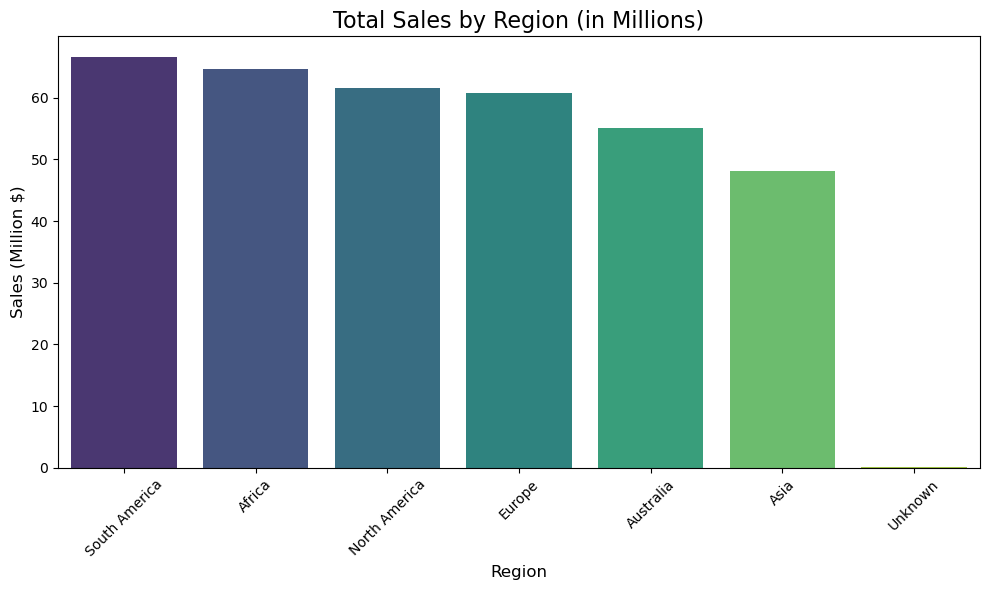

In [141]:
sales_by_region = sales_revenue_fact1.groupby('Region')['SalesAmount'].sum().sort_values(ascending=False).reset_index()
sales_by_region['SalesAmount'] = (sales_by_region['SalesAmount'] / 1_000_000)

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_region, x='Region', y='SalesAmount', palette='viridis')
plt.title('Total Sales by Region (in Millions)', fontsize=16)
plt.ylabel('Sales (Million $)', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [143]:
# 8. Sales by Product Categories

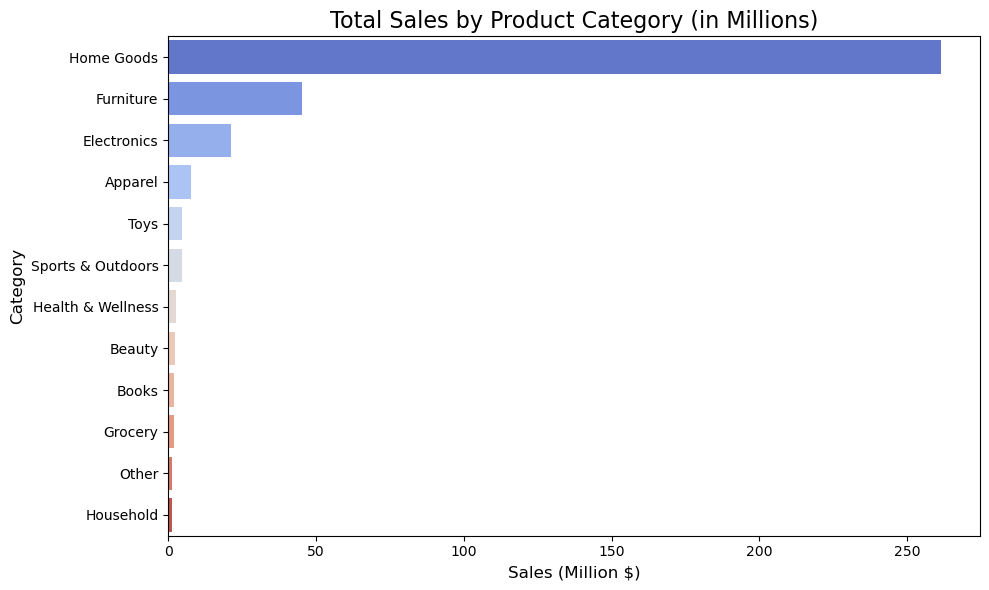

In [145]:
sales_by_category = sales_revenue_fact1.groupby('Category')['SalesAmount'].sum().sort_values(ascending=False).reset_index()
sales_by_category['SalesAmount'] = sales_by_category['SalesAmount'] / 1_000_000

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_category, y='Category', x='SalesAmount', palette='coolwarm')

plt.title('Total Sales by Product Category (in Millions)', fontsize=16)
plt.xlabel('Sales (Million $)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

In [147]:
# 9. Top Selling Products

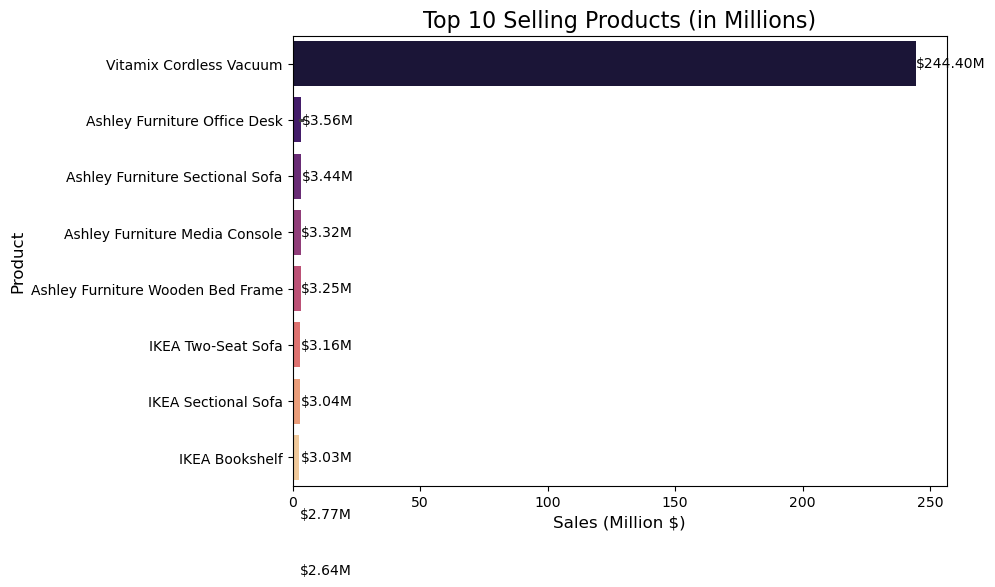

In [149]:
top_products = sales_revenue_fact1.groupby(['ProductID', 'ProductName'])['SalesAmount'].sum().sort_values(ascending=False).reset_index()

# 3. Convert to millions for cleaner display
top_products['SalesMillions'] = top_products['SalesAmount'] / 1_000_000
top_products['SalesFormatted'] = top_products['SalesMillions'].apply(lambda x: f"${x:.2f}M")

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_products.head(10),
    y='ProductName',
    x='SalesMillions',
    palette='magma'
)

# Add value labels
for index, row in top_products.head(10).iterrows():
    plt.text(row['SalesMillions'] + 0.1, index, row['SalesFormatted'], va='center')

plt.title('Top 10 Selling Products (in Millions)', fontsize=16)
plt.xlabel('Sales (Million $)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

In [151]:
# 10. Top 5 Brands

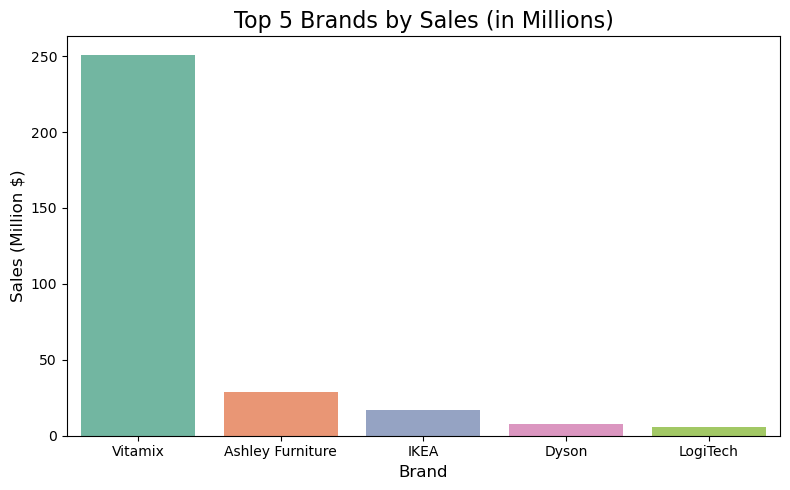

In [308]:
sales_by_brand = sales_revenue_fact1.groupby('Brand')['SalesAmount'].sum().sort_values(ascending=False).reset_index()
top5_brands = sales_by_brand.head(5)
top5_brands['SalesAmount'] = top5_brands['SalesAmount'] / 1_000_000

plt.figure(figsize=(8,5))
sns.barplot(data=top5_brands, x='Brand', y='SalesAmount', palette='Set2')

plt.title('Top 5 Brands by Sales (in Millions)', fontsize=16)
plt.ylabel('Sales (Million $)', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()

In [155]:
# 11. Distribution of our sales across different warehouses

In [157]:
sales_distribution = sales_revenue_fact1.groupby(["WarehouseID", "Location"])["SalesAmount"].sum().sort_values(ascending = False).reset_index()
sales_distribution = sales_distribution.rename(columns = {"SalesAmount" : "TotalSales($)"})
sales_distribution["SalesShare (%)"] = (sales_distribution["TotalSales($)"]/sales_distribution["TotalSales($)"].sum() * 100).round(2)
sales_distribution

,WarehouseID,Location,TotalSales($),SalesShare (%)
0,8,West Davidborough,18561294.85,5.20
1,2,West Nicoleton,18129115.97,5.08
2,1,Robertfurt,16934413.23,4.74
3,7,Wilcoxville,15472012.55,4.33
4,20,Murphyhaven,15377431.86,4.31
...,...,...,...,...
195,105,Barreraview,88850.84,0.02
196,138,West Jonathan,88300.00,0.02
197,163,South Bobmouth,88234.87,0.02
198,39,Nathanborough,87045.97,0.02


In [159]:
# Top 5 warehouse

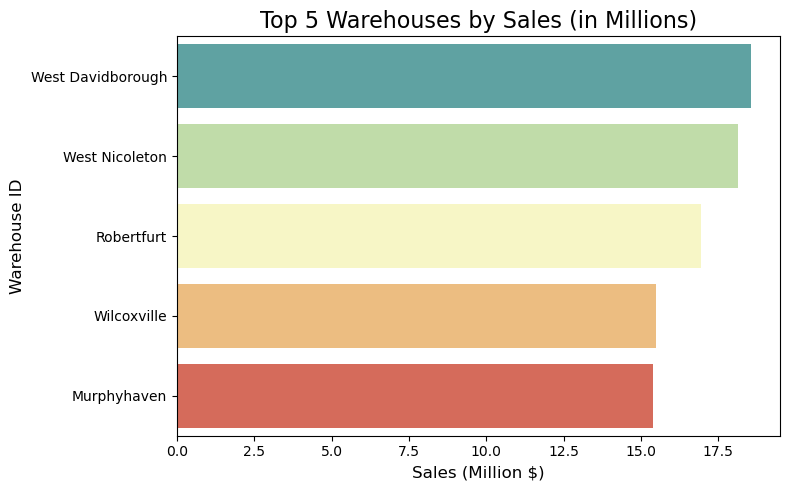

In [161]:
top5_warehouses = sales_revenue_fact1.groupby(['WarehouseID', 'Location'])['SalesAmount'].sum().reset_index().sort_values(by = 'SalesAmount', ascending=False).head(5)

top5_warehouses['SalesAmount'] = top5_warehouses['SalesAmount'] / 1_000_000

# 5. Horizontal bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=top5_warehouses, y='Location', x='SalesAmount', palette='Spectral_r')

plt.title('Top 5 Warehouses by Sales (in Millions)', fontsize=16)
plt.xlabel('Sales (Million $)', fontsize=12)
plt.ylabel('Warehouse ID', fontsize=12)
plt.tight_layout()
plt.show()

In [162]:
# 12. Top 10 Customers

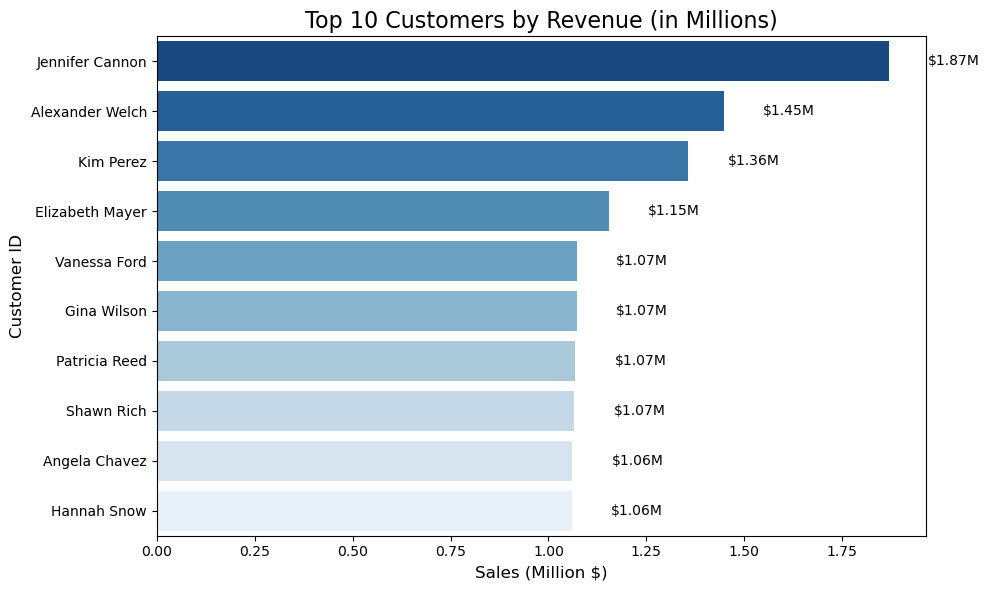

In [165]:
top10_customers = sales_revenue_fact1.groupby(['CustomerID', 'CustomerName'])['SalesAmount'].sum().sort_values(ascending=False).reset_index().head(10)
top10_customers['SalesMillions'] = top10_customers['SalesAmount'] / 1_000_000
top10_customers['SalesFormatted'] = top10_customers['SalesMillions'].apply(lambda x: f"${x:.2f}M")

# 5. Horizontal bar chart visualization
plt.figure(figsize=(10,6))
sns.barplot(data=top10_customers, y='CustomerName', x='SalesMillions', palette='Blues_r')

# Add value labels on bars
for index, row in top10_customers.iterrows():
    plt.text(row['SalesMillions'] + 0.1, index, row['SalesFormatted'], va='center')

plt.title('Top 10 Customers by Revenue (in Millions)', fontsize=16)
plt.xlabel('Sales (Million $)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.tight_layout()
plt.show()

In [167]:
# 13. Sales Growth - Month - Over- Month

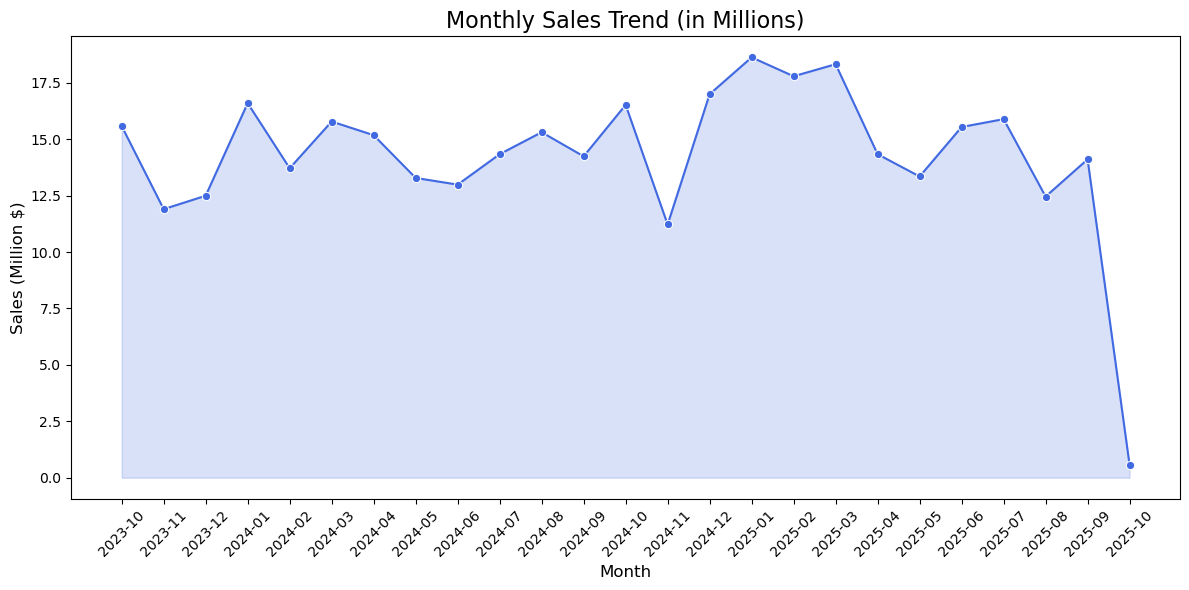

In [310]:
# Extract Month and Year for monthly trend
sales_revenue_fact1['YearMonth'] = sales_revenue_fact1['Date'].dt.to_period('M').astype(str)

monthly_sales = sales_revenue_fact1.groupby('YearMonth')['SalesAmount'].sum().reset_index()
monthly_sales['SalesAmount'] = monthly_sales['SalesAmount'] / 1_000_000

# 5. Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='SalesAmount', marker='o', color='royalblue')
plt.fill_between(monthly_sales['YearMonth'].astype(str), monthly_sales['SalesAmount'], alpha=0.2, color='royalblue')

plt.title('Monthly Sales Trend (in Millions)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (Million $)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [169]:
# 14. Monthly Sales Growth (%)

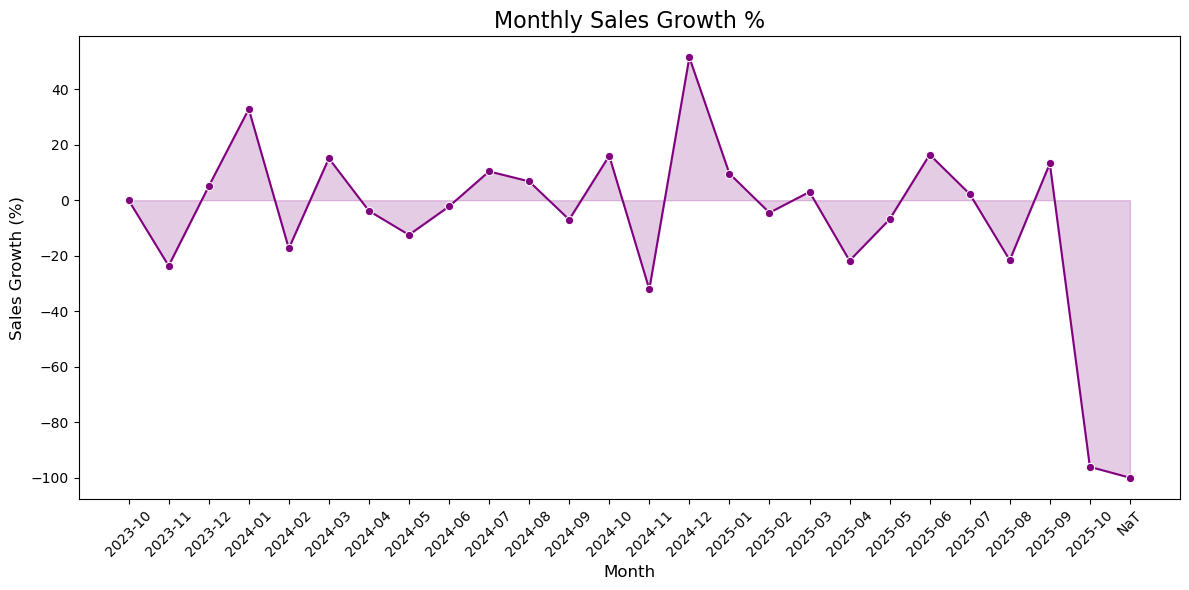

In [172]:
monthly_sales = sales_revenue_fact1.groupby('YearMonth')['SalesAmount'].sum().reset_index()

# Calculate month-on-month Sales Growth %
monthly_sales['SalesGrowthPct'] = monthly_sales['SalesAmount'].pct_change() * 100

# Replace NaN in first month with 0
monthly_sales['SalesGrowthPct'] = monthly_sales['SalesGrowthPct'].fillna(0)

# Line chart for Sales Growth %
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='SalesGrowthPct', marker='o', color='purple')
plt.fill_between(monthly_sales['YearMonth'], monthly_sales['SalesGrowthPct'], alpha=0.2, color='purple')

plt.title('Monthly Sales Growth %', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Growth (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [171]:
# 15. Payment method distribution

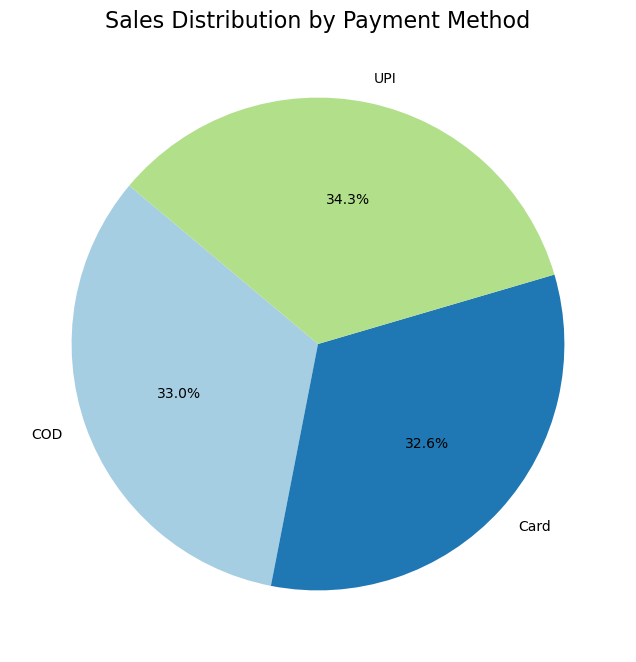

In [176]:
payment_sales = sales_revenue_fact1.groupby('PaymentMethod')['SalesAmount'].sum().reset_index()
payment_sales['SalesAmount'] = payment_sales['SalesAmount'] / 1_000_000

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    payment_sales['SalesAmount'], 
    labels=payment_sales['PaymentMethod'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title('Sales Distribution by Payment Method', fontsize=16)
plt.show()

In [173]:
# 16. Order Status %

<Figure size 800x800 with 0 Axes>

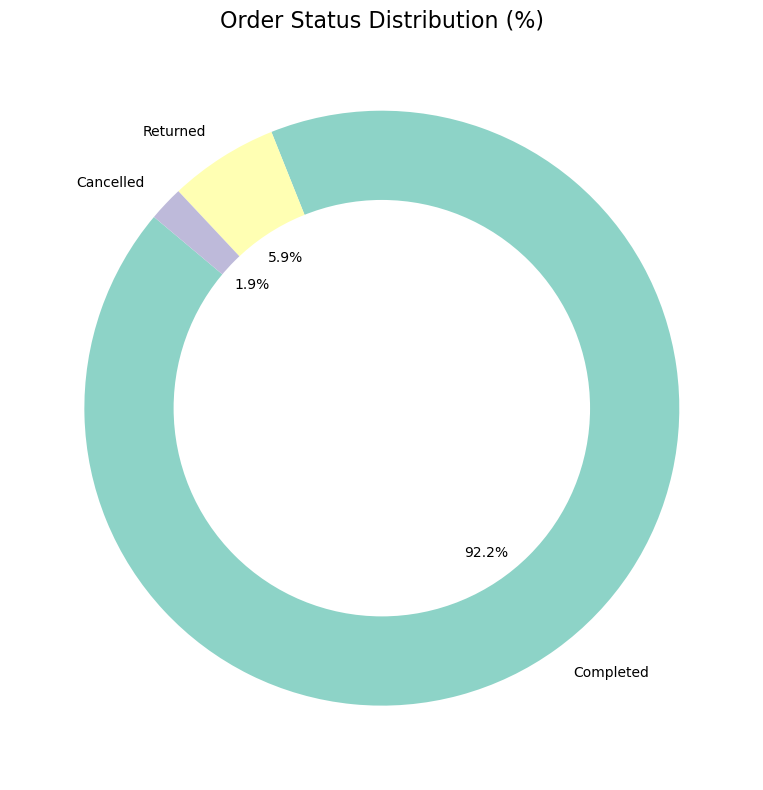

In [179]:
plt.figure(figsize=(8,8))
order_status_counts = sales_revenue_fact['OrderStatus'].value_counts()

# Donut chart
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    order_status_counts, 
    labels=order_status_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)
# Draw center circle for donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Order Status Distribution (%)', fontsize=16)
plt.tight_layout()
plt.show()

In [175]:
# 17. Offline vs Online

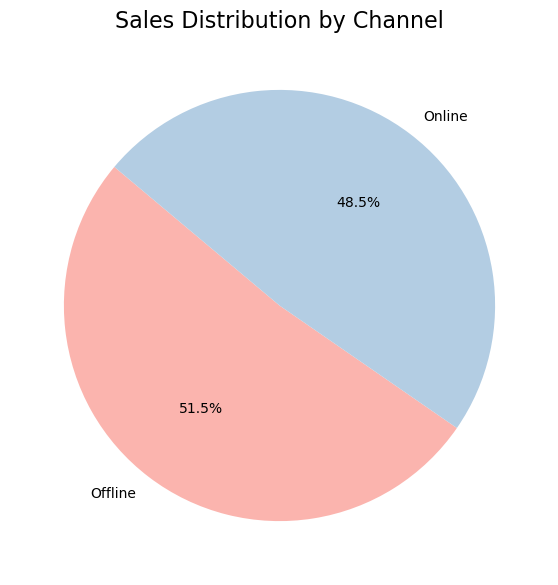

In [184]:
sales_by_channel = sales_revenue_fact1.groupby('SalesChannel')['SalesAmount'].sum().reset_index()

sales_by_channel['SalesAmount'] = sales_by_channel['SalesAmount'] / 1_000_000
plt.figure(figsize=(7,7))
plt.pie(
    sales_by_channel['SalesAmount'],
    labels=sales_by_channel['SalesChannel'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Sales Distribution by Channel', fontsize=16)
plt.show()

In [177]:
# 18. Revenue vs Quantity Sold per Product

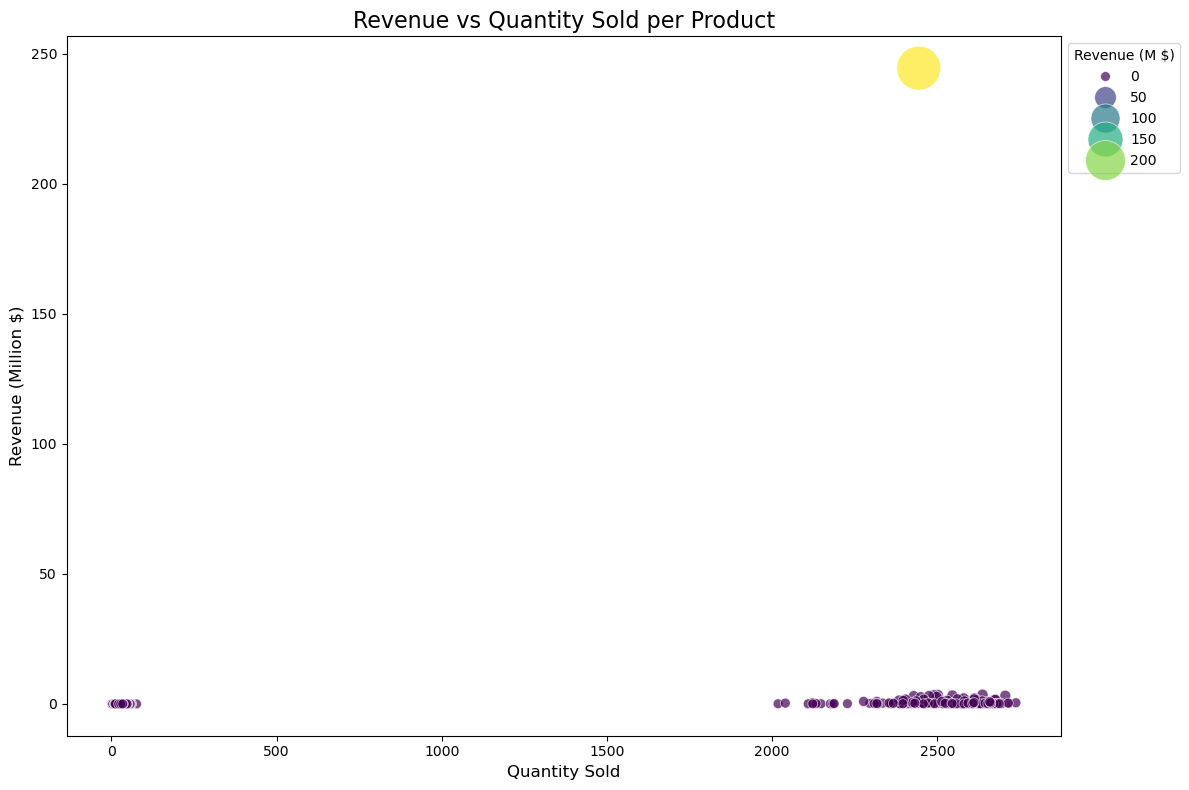

In [188]:
product_sales = sales_revenue_fact1.groupby(['ProductID', 'ProductName']).agg({
    'SalesAmount':'sum',
    'Quantity':'sum'
}).reset_index()
product_sales['SalesAmount'] = product_sales['SalesAmount'] / 1_000_000

# Scatter / Bubble Chart
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=product_sales,
    x='Quantity', 
    y='SalesAmount', 
    size='SalesAmount',   # bubble size by revenue
    sizes=(50, 1000),     # min and max bubble sizes
    hue='SalesAmount',    # color gradient by revenue
    palette='viridis',
    alpha=0.7
)

plt.title('Revenue vs Quantity Sold per Product', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Revenue (Million $)', fontsize=12)
plt.legend(title='Revenue (M $)', loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [179]:
# 19. Revenue vs Number of Orders per Customer

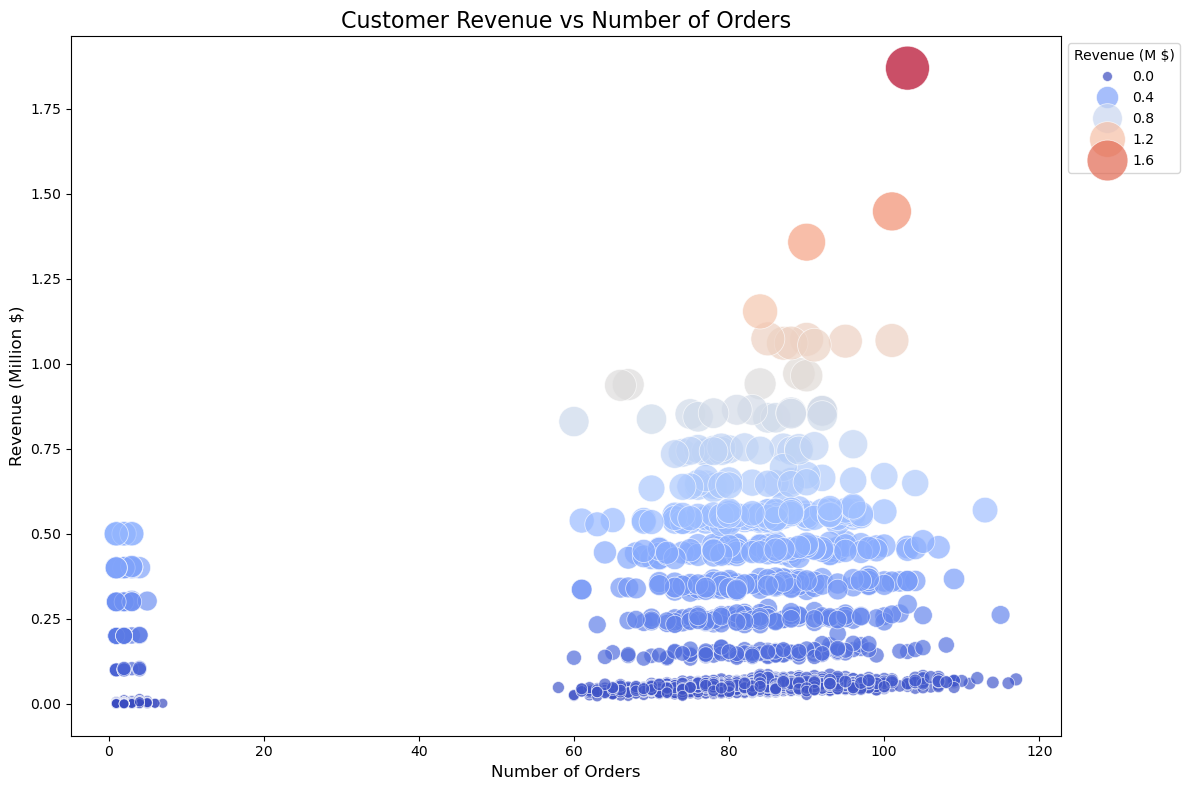

In [181]:
customer_sales = sales_revenue_fact1.groupby(['CustomerID', 'CustomerName']).agg({
    'SalesAmount':'sum',
    'SaleID':'nunique'  # count of unique orders
}).reset_index().rename(columns={'SaleID':'NumOrders'})

# 2. Convert SalesAmount to millions for readability
customer_sales['SalesMillions'] = customer_sales['SalesAmount'] / 1_000_000

# 3. Scatter / Bubble Chart
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=customer_sales,
    x='NumOrders', 
    y='SalesMillions', 
    size='SalesMillions',       # bubble size by revenue
    sizes=(50, 1000),           # min and max bubble sizes
    hue='SalesMillions',         # color gradient by revenue
    palette='coolwarm',
    alpha=0.7
)

plt.title('Customer Revenue vs Number of Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Revenue (Million $)', fontsize=12)
plt.legend(title='Revenue (M $)', loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [183]:
# Export the Sales Performance table data to csv file.
sales_revenue_fact.to_csv('Sales Performance Data.csv', index = False)

#### 2. Inventory Optimization Data analysis and Visualization

In [188]:
# 1. Safety Stock Breach %

In [190]:
def calculate_safety_stock_breach(inventory_agg):
    # Count products below safety stock
    breached_count = inventory_agg[inventory_agg['StockOnHand'] < inventory_agg['SafetyStock']].shape[0]
    
    # Total products
    total_products = inventory_agg.shape[0]
    
    # Safety Stock Breach %
    breach_percent = (breached_count / total_products) * 100
    
    return round(breach_percent, 2)

safety_breach = calculate_safety_stock_breach(inventory_agg)
print(f"Safety Stock Breach %: {safety_breach}%")


Safety Stock Breach %: 0.23%


In [192]:
# 2. Stock Turnover Ratio

In [194]:
def calculate_stock_turnover_inventory_fact(inventory_agg):
    # COGS approximated using AvgMonthlySales * CostPrice
    inventory_agg['COGS'] = inventory_agg['AvgMonthlySales'] * inventory_fact['CostPrice']
    total_cogs = inventory_agg['COGS'].sum()
    
    # Average inventory value
    avg_inventory_value = (inventory_agg['StockOnHand'] * inventory_agg['LastPurchasePrice']).mean()
    
    # Stock Turnover Ratio
    turnover_ratio = total_cogs / avg_inventory_value if avg_inventory_value != 0 else 0
    return round(turnover_ratio, 2)

stock_turnover = calculate_stock_turnover_inventory_fact(inventory_agg)
print(f"Stock Turnover Ratio: {stock_turnover}")


Stock Turnover Ratio: 370.17


In [196]:
# 3. Reorder Alerts

In [198]:
total_products = inventory_agg.shape[0]
reorder_alerts = (inventory_agg["StockOnHand"] < inventory_agg["ReorderLevel"]).sum()
reorder_pct = round((reorder_alerts / total_products) * 100, 2)

print(f"Reorder Alerts: {reorder_alerts} products ({reorder_pct}% of total) are below reorder level")


Reorder Alerts: 178 products (0.45% of total) are below reorder level


In [200]:
# 4. Stock on Hand

In [202]:
stock_on_hand = inventory_agg['StockOnHand'].sum()
print(f"Total Stock on Hand (SoH): {stock_on_hand:,} units")

Total Stock on Hand (SoH): 13,020,383 units


In [204]:
# 5. Stockout Rate %

In [206]:
stockout_count = (inventory_agg['StockOnHand'] == 0).sum()
total_products = inventory_agg.shape[0]
stockout_rate = (stockout_count / total_products) * 100

print(f"Stockout Rate: {stockout_rate:.4f}%")

Stockout Rate: 0.0025%


In [208]:
# 6. Carrying cost

In [210]:
# Carrying cost rate per unit of inventory (e.g., 20% per year)
carrying_cost_rate = 0.20

# Inventory Value = StockOnHand * LastPurchasePrice
inventory_agg['InventoryValue'] = inventory_agg['StockOnHand'] * inventory_agg['LastPurchasePrice']

# Carrying Cost per product
inventory_agg['CarryingCost'] = inventory_agg['InventoryValue'] * carrying_cost_rate

# Carrying Cost % of total inventory value
total_inventory_value = inventory_agg['InventoryValue'].sum()
total_carrying_cost = inventory_agg['CarryingCost'].sum()

print(f"Carrying Cost: ${total_carrying_cost:2f}")


Carrying Cost: $658628132.464000


In [212]:
# 7. Capacity Utilization

In [214]:
inventory_agg['CapacityUtilizationpct'] = (inventory_agg['StockOnHand'] / inventory_agg['Capacity']) * 100
avg_capacity_util  = inventory_agg['CapacityUtilizationpct'].mean()
print(f"Average Warehouse Capacity Utilization: {avg_capacity_util:.2f}%")

Average Warehouse Capacity Utilization: 3.09%


In [216]:
# 8. Reorder Alert per Warehouse

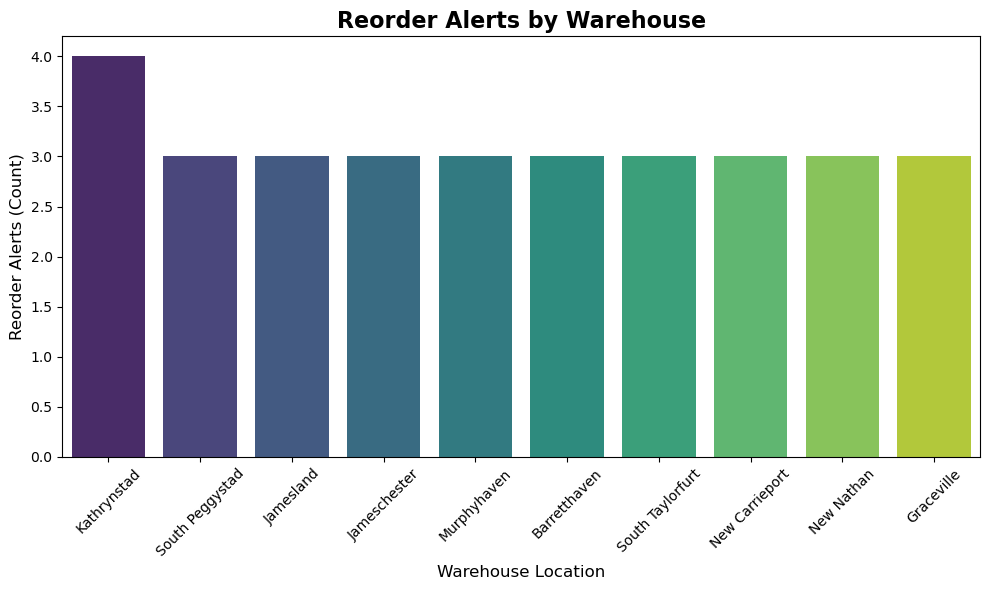

In [218]:
inventory_agg['ReorderAlert'] = inventory_agg.apply(
    lambda x: 'Yes' if x['StockOnHand'] < x['ReorderLevel'] else 'No', axis=1)

# Aggregate by Warehouse
reorder_count = (
    inventory_agg[inventory_agg['ReorderAlert']=='Yes']
    .groupby(['WarehouseID','Location'])['ReorderAlert']
    .count()
    .reset_index()
    .rename(columns={'ReorderAlert':'ReorderAlertCount'})
)

top10_warehosue = reorder_count.sort_values(by = 'ReorderAlertCount', ascending = False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_warehosue, x='Location', y='ReorderAlertCount', palette='viridis')

plt.title("Reorder Alerts by Warehouse", fontsize=16, fontweight="bold")
plt.xlabel("Warehouse Location", fontsize=12)
plt.ylabel("Reorder Alerts (Count)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [220]:
# 9. Stock Aging / Dead Stock %

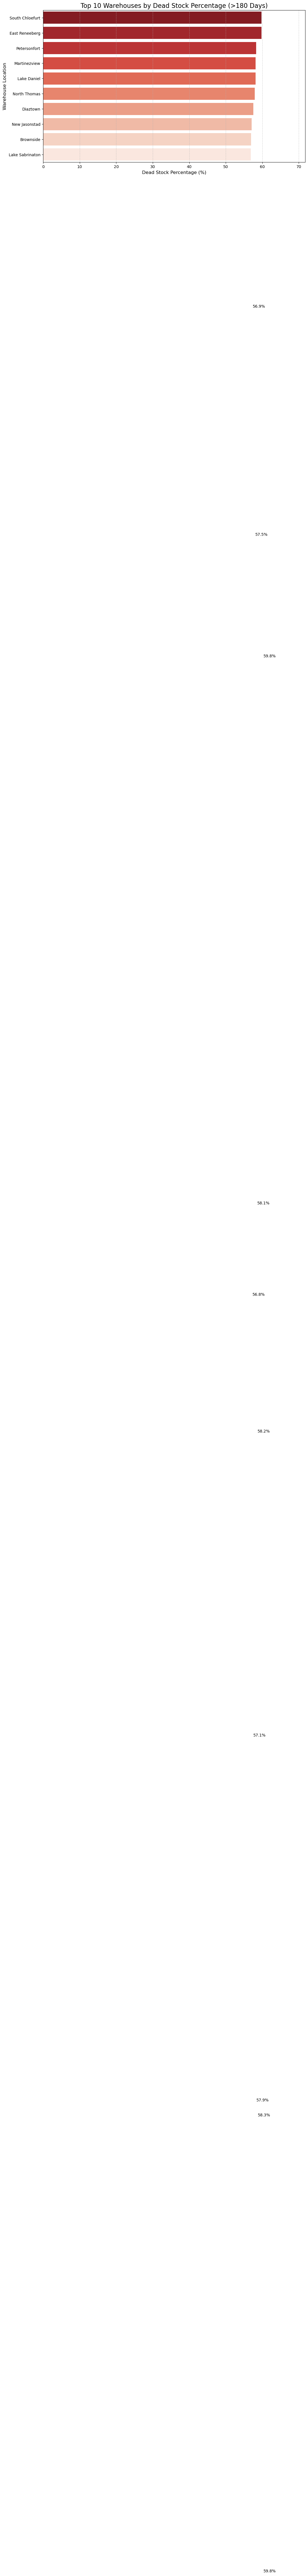

In [222]:
threshold = 180  # days
inventory_agg['DeadFlag'] = inventory_agg["StockAgeDays"] > threshold

# Aggregate by Warehouse
deadstock_warehouse = inventory_agg.groupby('Location').agg(
    TotalProducts=('InventoryID', 'count'),
    DeadStockCount=('DeadFlag', 'sum')
).reset_index()

# Calculate Dead Stock %
deadstock_warehouse['DeadStockPct'] = round(
    (deadstock_warehouse['DeadStockCount'] / deadstock_warehouse['TotalProducts']) * 100, 2)

# Sort descending by DeadStock %
deadstock_warehouse = deadstock_warehouse.sort_values('DeadStockPct', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(
    x='DeadStockPct',
    y='Location',
    data=deadstock_warehouse,
    palette='Reds_r' # 'Reds_r' means Reverse Reds (darker for higher values)
)

# Add labels and title
plt.title('Top 10 Warehouses by Dead Stock Percentage (>180 Days)', fontsize=16)
plt.xlabel('Dead Stock Percentage (%)', fontsize=12)
plt.ylabel('Warehouse Location', fontsize=12)

# Add the percentage values on the bars for clarity
for index, row in deadstock_warehouse.head(10).iterrows():
    plt.text(row['DeadStockPct'] + 0.5, # x position (a little offset)
             index, # y position
             f"{row['DeadStockPct']:.1f}%", # text format
             color='black',
             ha="left",
             va="center",
             fontsize=10)

# Adjust x-axis limits to accommodate text labels
plt.xlim(0, deadstock_warehouse['DeadStockPct'].max() * 1.2)

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [223]:
# 10. #Inventory Value by Warehouse

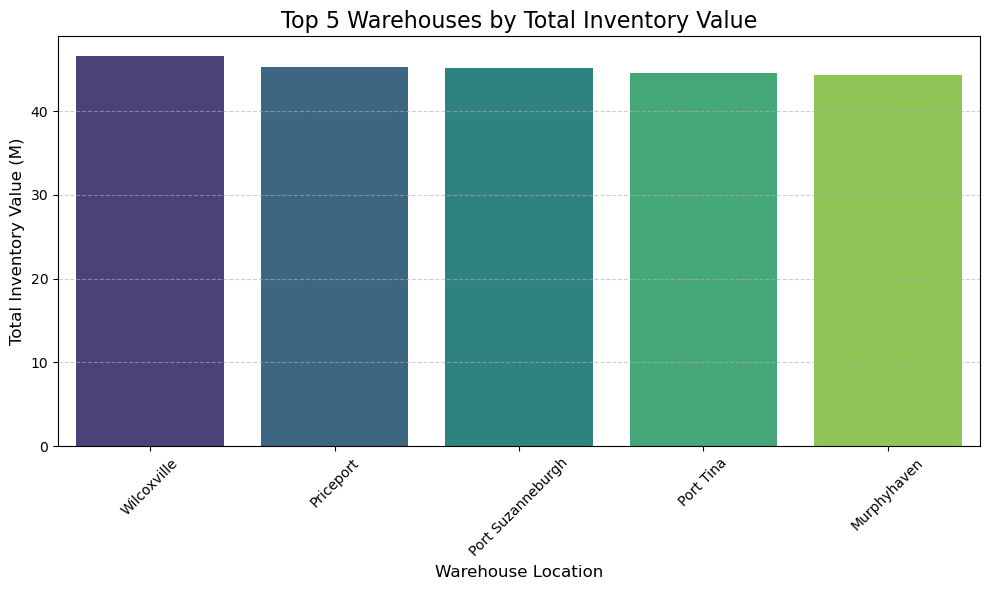

In [224]:
inventory_agg['InventoryValue'] = inventory_agg['StockOnHand'] * inventory_agg['LastPurchasePrice']

# Aggregate by warehouse
inventory_by_warehouse = inventory_agg.groupby('Location')['InventoryValue'].sum().reset_index()
inventory_by_warehouse['InventoryValue'] = inventory_by_warehouse['InventoryValue'] / 1_000_000
inventory_by_warehouse = inventory_by_warehouse.sort_values('InventoryValue', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Location',y='InventoryValue',data=inventory_by_warehouse, palette='viridis')
plt.title('Top 5 Warehouses by Total Inventory Value', fontsize=16)
plt.xlabel('Warehouse Location', fontsize=12)
plt.ylabel('Total Inventory Value (M)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

In [228]:
# 11. Fast vs slow moving products

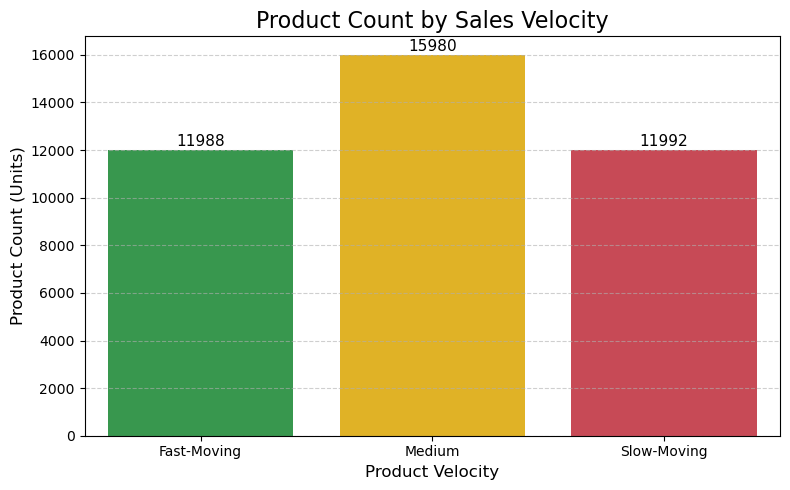

In [230]:
# Define thresholds (example: top 30% fast, bottom 30% slow)
fast_threshold = inventory_agg['AvgMonthlySales'].quantile(0.7)
slow_threshold = inventory_agg['AvgMonthlySales'].quantile(0.3)

# Flag products
inventory_agg['Velocity'] = inventory_agg['AvgMonthlySales'].apply(
    lambda x: 'Fast-Moving' if x >= fast_threshold else ('Slow-Moving' if x <= slow_threshold else 'Medium')
)

velocity_counts = inventory_agg.groupby('Velocity')['ProductID'].count().reset_index(name='Count')

plt.figure(figsize=(8, 5))

colors = ['#28a745', '#ffc107', '#dc3545'] # Green, Yellow, Red
sns.barplot(x='Velocity',y='Count',data=velocity_counts,palette=colors)

# Add value labels on top of the bars
for index, row in velocity_counts.iterrows():
    plt.text(
        index, # x position
        row['Count'] + 50, # y position (offset above the bar)
        f"{row['Count']}",
        color='black',
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.title('Product Count by Sales Velocity', fontsize=16)
plt.xlabel('Product Velocity', fontsize=12)
plt.ylabel('Product Count (Units)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

In [231]:
# 12. Warehouse vs Region Utilization

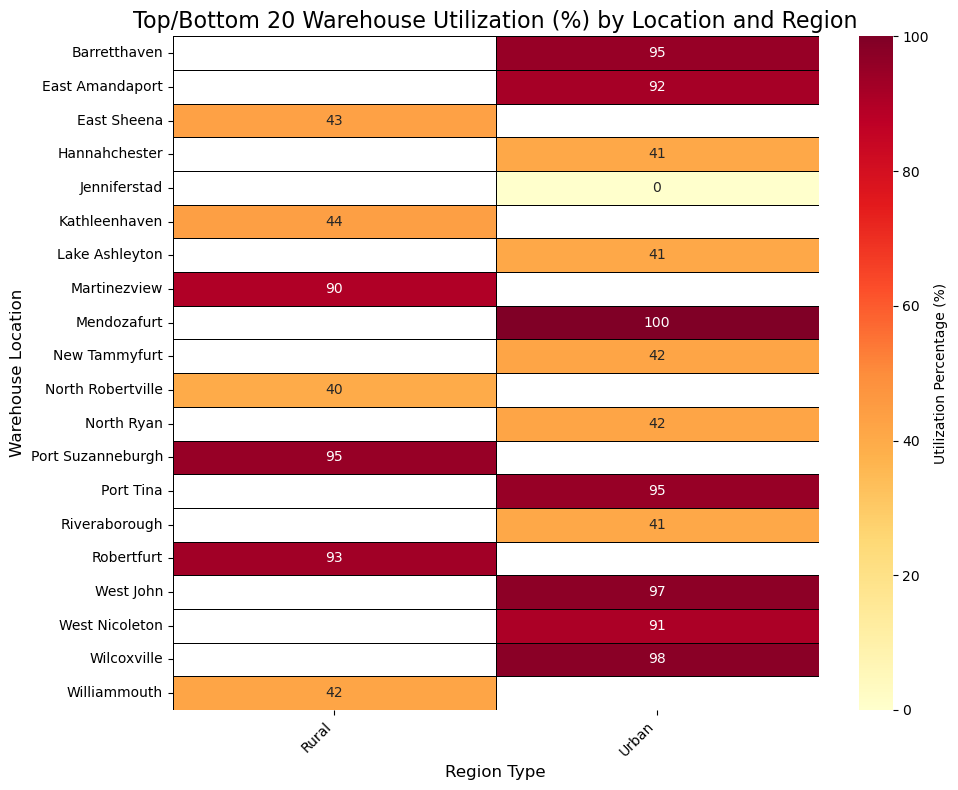

In [234]:
utilization_summary = inventory_agg.groupby(['RegionType', 'Location'])['CapacityUsed'].mean().mul(100).round(2).reset_index(name='AvgCapacityUsedPct')
sorted_data = utilization_summary.sort_values('AvgCapacityUsedPct', ascending=False)

# select the Top 10 (Head) and Bottom 10 (Tail) and concatenate
extreme_utilization_df = pd.concat([
    sorted_data.head(10),
    sorted_data.tail(10)
]).reset_index(drop=True) 

# Pivot the filtered data for the heatmap matrix
heatmap_matrix = extreme_utilization_df.pivot_table(
    index='Location',
    columns='RegionType',
    values='AvgCapacityUsedPct',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_matrix, # Use the clearer name for the pivoted matrix
    annot=True,          # Show the utilization percentage in each cell
    fmt=".0f",           # Format the annotation as an integer
    cmap="YlOrRd",       # Color map: Yellow-Orange-Red (Red for high utilization)
    linewidths=.5,       # Add lines between cells for clarity
    linecolor='black',
    cbar_kws={'label': 'Utilization Percentage (%)'} # Label the color bar
)

plt.title('Top/Bottom 20 Warehouse Utilization (%) by Location and Region', fontsize=16)
plt.ylabel('Warehouse Location', fontsize=12)
plt.xlabel('Region Type', fontsize=12) # Changed to Region Type for clarity
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [236]:
# 13. Stock Status %

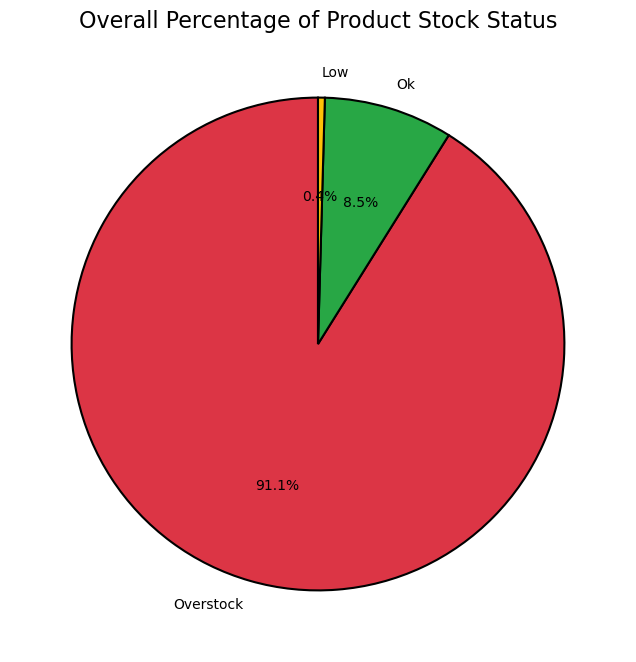

In [238]:
status_counts = inventory_agg['StockStatus'].value_counts()

# Define corresponding colors (Red for Low, Green for OK, Yellow for Overstock)
colors_ordered = ['#dc3545', '#28a745', '#ffc107']

plt.figure(figsize=(8, 8))
plt.pie(
    status_counts.values,            # Use the counts (values) for the slice sizes
    labels=status_counts.index,      # Use the status names (index) for the labels
    colors=colors_ordered,
    autopct='%1.1f%%',                # Display percentage inside the slice
    startangle=90,                    # Start the chart at the top
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Overall Percentage of Product Stock Status', fontsize=16)
plt.show()

In [240]:
# 14. category contribution to inventory value

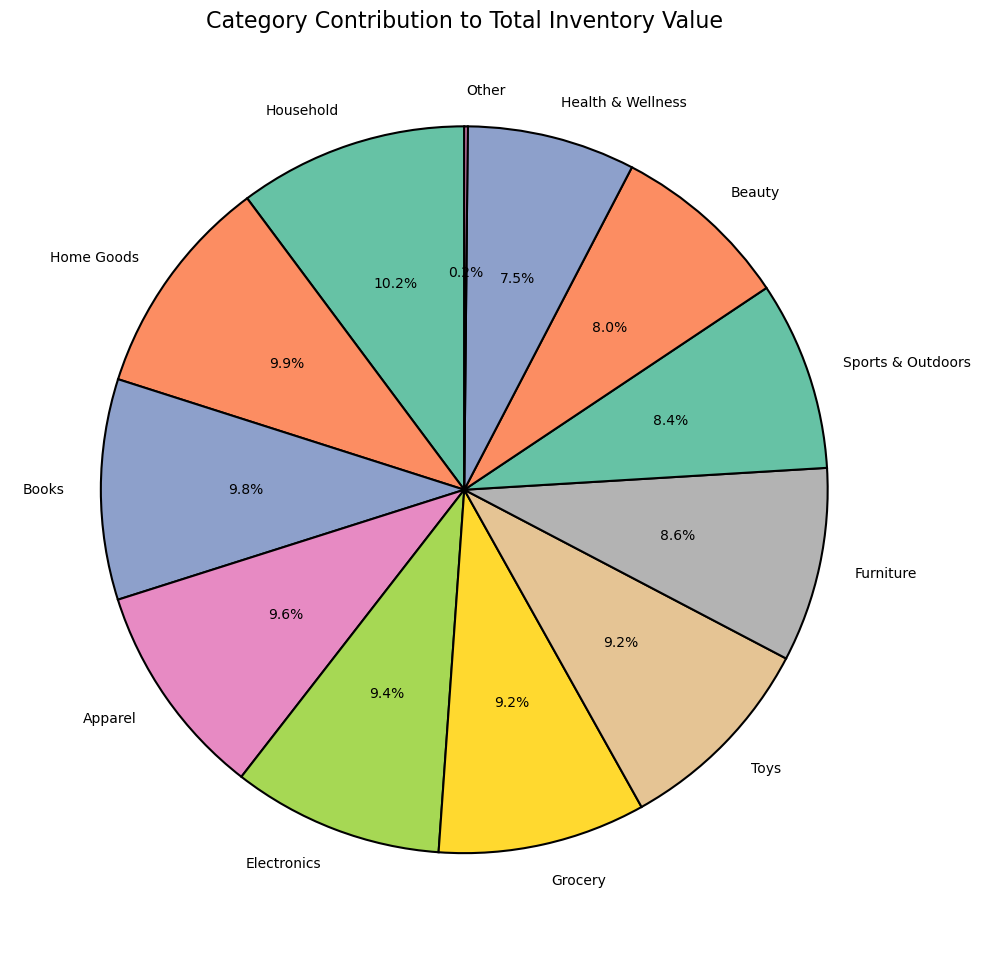

In [242]:
category_inventory = inventory_agg.groupby('Category')['InventoryValue'].sum().reset_index()

total_inventory_value = category_inventory['InventoryValue'].sum()
category_inventory['ContributionPct'] = (category_inventory['InventoryValue'] / total_inventory_value) * 100

category_inventory = category_inventory.sort_values(by='ContributionPct', ascending=False)

labels = category_inventory['Category']
sizes = category_inventory['ContributionPct']

colors = sns.color_palette('Set2', len(labels))

plt.figure(figsize=(10, 10))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',        # Format the percentage value inside the slice
    startangle=90,            # Start the largest slice at the top for easy reading
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Category Contribution to Total Inventory Value', fontsize=16)
plt.tight_layout()
plt.show()

In [244]:
# 15. product stock vs sales velocity

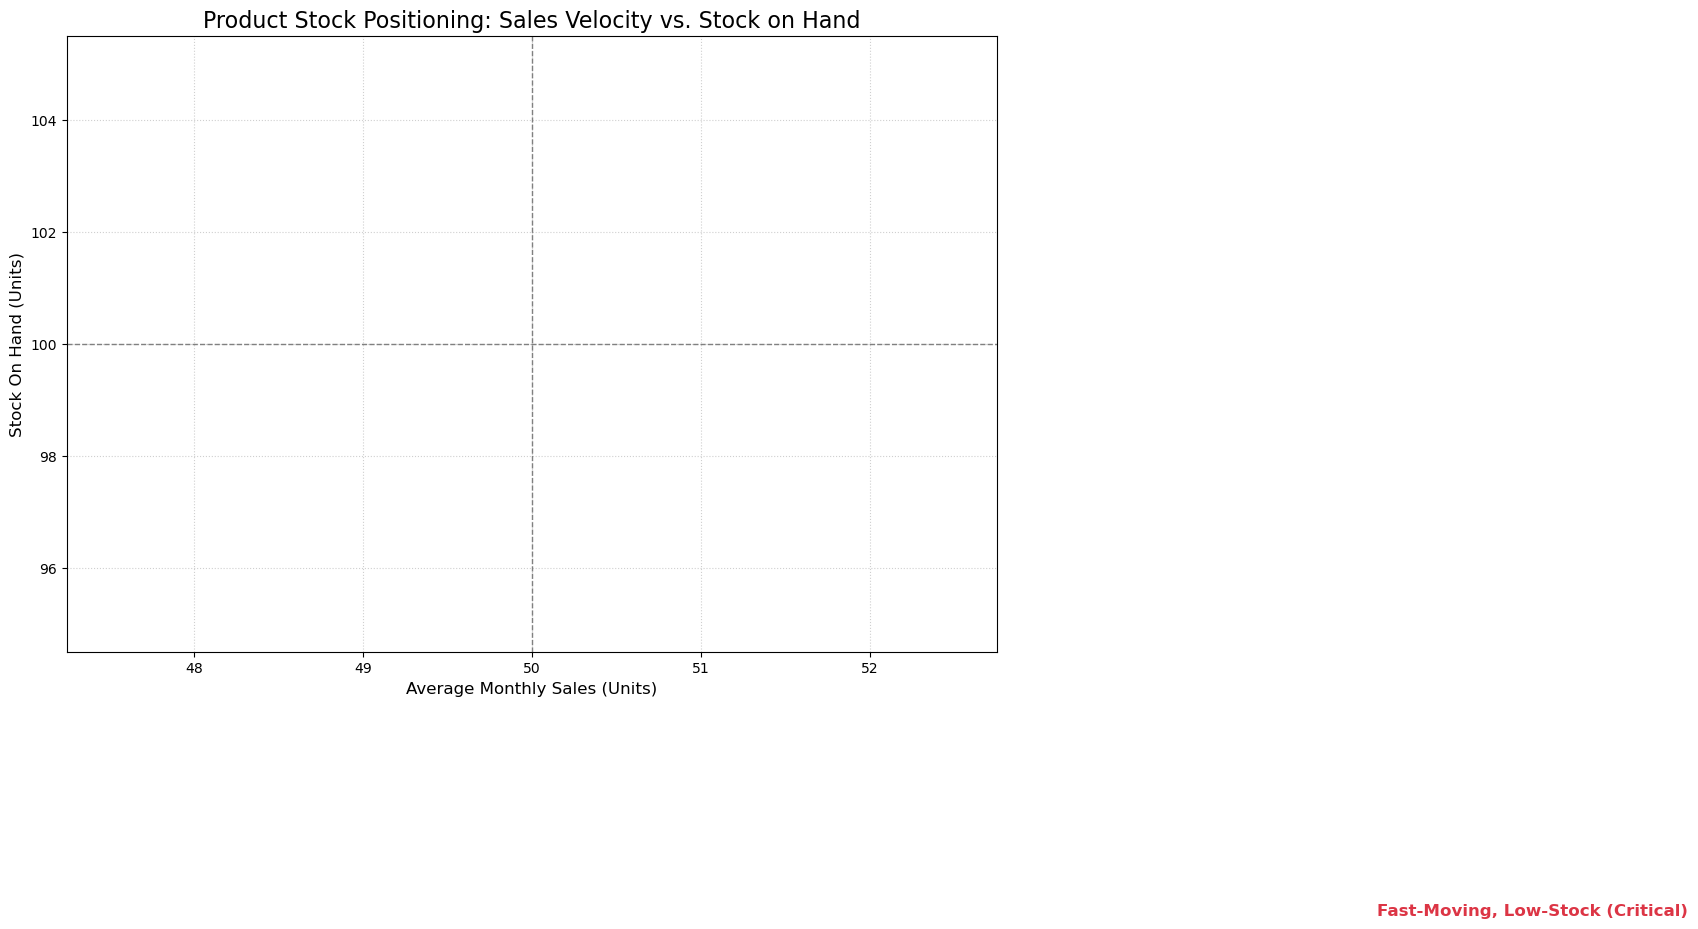

In [246]:
# Flag fast-moving but low-stock products
# Define thresholds (example: AvgMonthlySales > 50 and StockOnHand < 100)
sales_threshold = 50
stock_threshold = 100
inventory_agg['FastLowStock'] = inventory_agg.apply(
    lambda x: 'Yes' if (x['AvgMonthlySales'] > sales_threshold) & (x['StockOnHand'] < stock_threshold) else 'No',axis=1)

fast_low_prod = inventory_agg[inventory_agg['FastLowStock']=='Yes']

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=fast_low_prod,
    x='AvgMonthlySales',
    y='StockOnHand',
    size='InventoryValue',  # Bubble size based on InventoryValue (financial impact)
    hue='FastLowStock',     # Color based on your calculated flag
    sizes=(50, 1000),       # Range of bubble sizes
    palette={'Yes': '#dc3545', 'No': '#3a98c5'}, # Red for critical, Blue for others
    alpha=0.7,              # Transparency
    legend='full'
)

# Highlight the critical zone with threshold lines
plt.axvline(x=sales_threshold, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=stock_threshold, color='gray', linestyle='--', linewidth=1)

# Annotate the critical area (Top-Left Quadrant)
plt.text(
    sales_threshold + 5,
    stock_threshold - 10,
    'Fast-Moving, Low-Stock (Critical)',
    color='#dc3545',
    fontsize=12,
    ha='left',
    va='top',
    fontweight='bold'
)

plt.title('Product Stock Positioning: Sales Velocity vs. Stock on Hand', fontsize=16)
plt.xlabel('Average Monthly Sales (Units)', fontsize=12)
plt.ylabel('Stock On Hand (Units)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

#### 3. Vendor Performance Data Analysis and Visualization

In [250]:
# 1. On-Time Delivery %

In [252]:
on_time_delivery = vendor_agg['OnTimeDeliveryPct'].mean().round(2)
print(f'On Time Delivery: {on_time_delivery}%')

On Time Delivery: 45.39%


In [258]:
# 2. Vendor Reliability Score

In [260]:
reliable_score = vendor_agg['ReliabilityScore'].mean().round(2)
print(f'Overall Vendors Reliable Score: {reliable_score}%')

Overall Vendors Reliable Score: 84.59%


In [262]:
# 3. TotalQuantity Delivered

In [264]:
total_quantity_del = vendor_agg['TotalDeliveredQty'].sum()
print(f'Total Quantity Delivered: {total_quantity_del} Units')

Total Quantity Delivered: 6888705 Units


In [266]:
# 4. Total Returned Quantity

In [268]:
total_rtn_quantity = vendor_agg['TotalReturnedQty'].sum()
print(f'Total Quantity Returned: {total_rtn_quantity} Units')

Total Quantity Returned: 71542 Units


In [270]:
# 5. On-Time Delivery % by Vendor

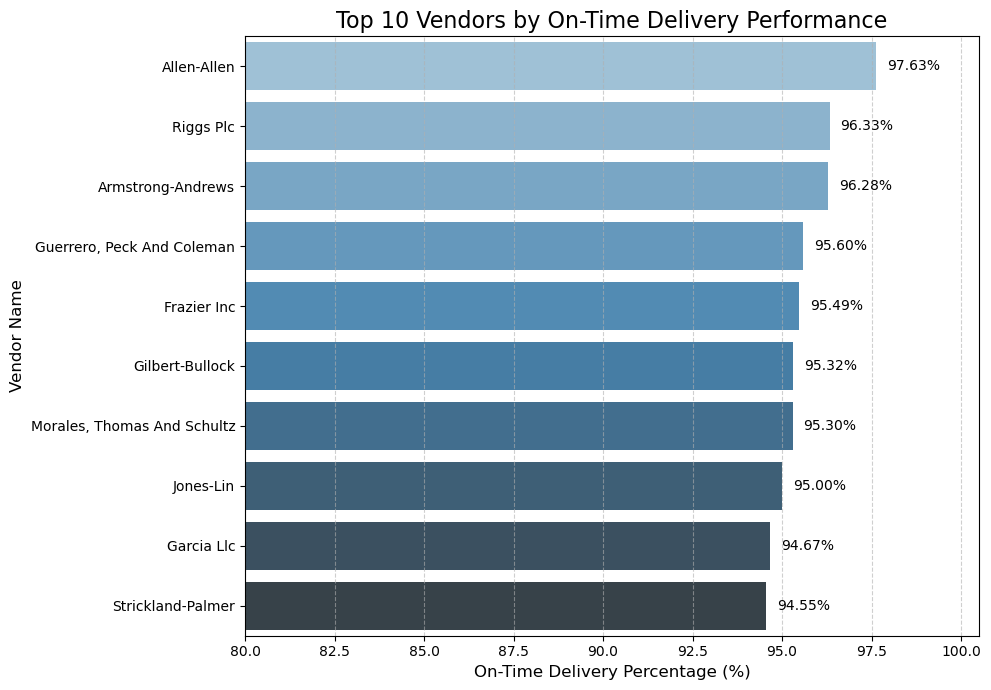

In [272]:
on_time_delivery = vendor_agg[['VendorID', 'VendorName', 'OnTimeDeliveryPct']].copy()
on_time_delivery = on_time_delivery.sort_values(by='OnTimeDeliveryPct', ascending=False)
top_performers = on_time_delivery.head(10).reset_index(drop=True)

plt.figure(figsize=(10, 7))

sns.barplot( x='OnTimeDeliveryPct', y='VendorName', data=top_performers, palette='Blues_d')

# Add percentage values on the bars
for index, row in top_performers.iterrows():
    plt.text(
        row['OnTimeDeliveryPct'] + 0.3 , # x position (a small offset)
        index,                         # y position
        f"{row['OnTimeDeliveryPct']:.2f}%", # text format
        color='black',
        ha="left",
        va="center",
        fontsize=10
    )

# Set titles and labels
plt.title('Top 10 Vendors by On-Time Delivery Performance', fontsize=16)
plt.xlabel('On-Time Delivery Percentage (%)', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)

# Set x-axis limits to focus on the high performance range (80% to 100%)
plt.xlim(80, 100.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [274]:
# 6. Total Quantity Delivered vs Returned Quantity

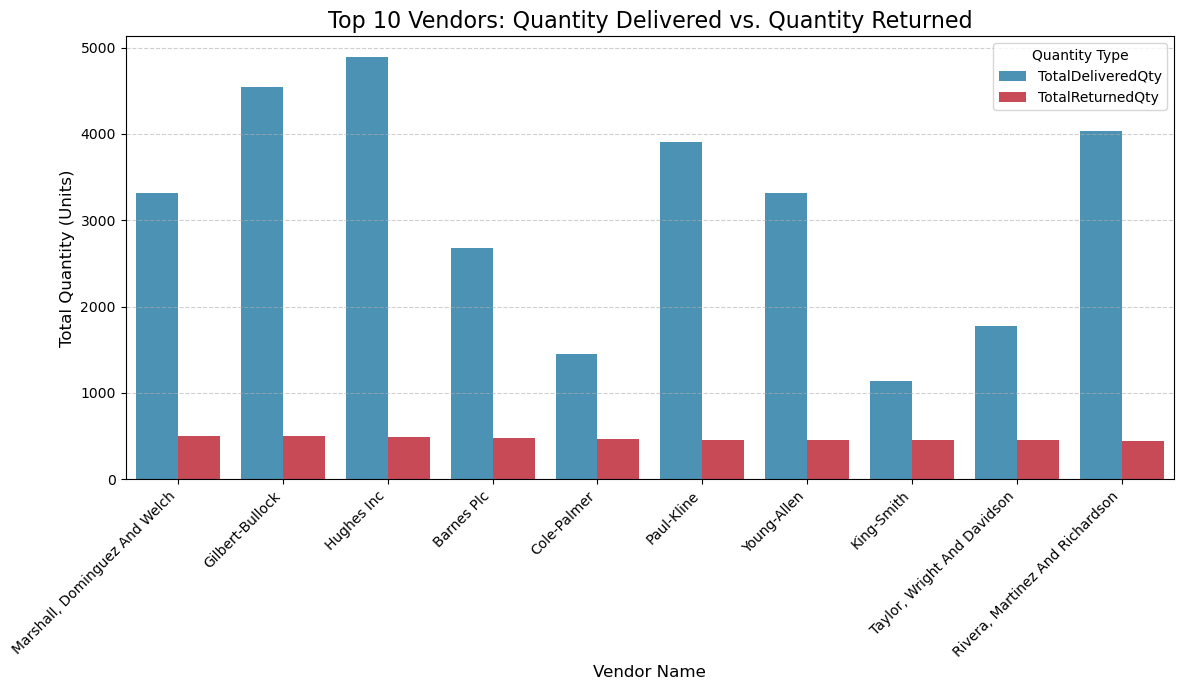

In [276]:
top_10_vendors = vendor_agg[['VendorName', 'TotalDeliveredQty', 'TotalReturnedQty']].sort_values(by = 'TotalReturnedQty', ascending = False).head(10)

# Melt the DataFrame to long format for easier plotting of grouped bars
plot_data = top_10_vendors.melt(
    id_vars=['VendorName'],
    value_vars=['TotalDeliveredQty', 'TotalReturnedQty'],
    var_name='QuantityType',
    value_name='Quantity'
)

plt.figure(figsize=(12, 7))

sns.barplot(
    x='VendorName',
    y='Quantity',
    hue='QuantityType',
    data=plot_data,
    palette={'TotalDeliveredQty': '#3a98c5', 'TotalReturnedQty': '#dc3545'} 
)

plt.title('Top 10 Vendors: Quantity Delivered vs. Quantity Returned', fontsize=16)
plt.xlabel('Vendor Name', fontsize=12)
plt.ylabel('Total Quantity (Units)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quantity Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [278]:
# 7. High impact suppliers

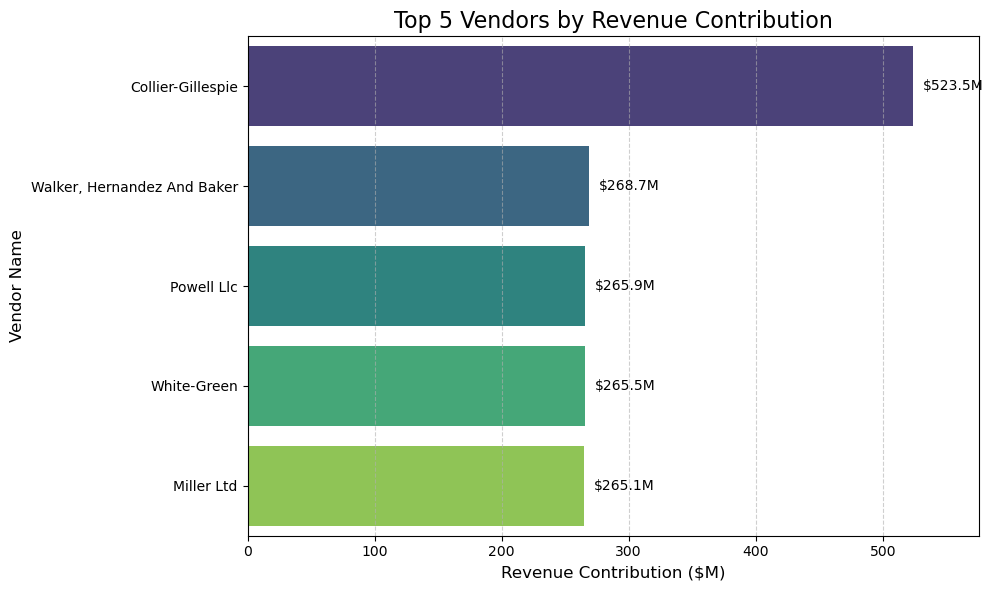

In [280]:
high_impact_suppliers = vendor_agg[['VendorName', 'RevenueContribution']].copy()
high_impact_suppliers = high_impact_suppliers.sort_values(
    by='RevenueContribution', ascending=False
).head(5).reset_index(drop=True)

high_impact_suppliers['RevenueContribution_M'] = (
    high_impact_suppliers['RevenueContribution'] / 1_000_000
).round(2)

# Get the max value for dynamic plotting adjustments
max_contribution = high_impact_suppliers['RevenueContribution_M'].max()

plt.figure(figsize=(10, 6))

sns.barplot(
    x='RevenueContribution_M',
    y='VendorName',
    data=high_impact_suppliers,
    palette='viridis'
)

for index, row in high_impact_suppliers.iterrows():
    plt.text(
        # Set x position slightly past the bar end, relative to the max value
        row['RevenueContribution_M'] + (max_contribution * 0.015),
        index,
        f"${row['RevenueContribution_M']:.1f}M",
        color='black',
        ha="left",
        va="center",
        fontsize=10
    )

plt.xlim(0, max_contribution * 1.1)

plt.title(f'Top 5 Vendors by Revenue Contribution', fontsize=16)
plt.xlabel('Revenue Contribution ($M)', fontsize=12)
plt.ylabel('Vendor Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [281]:
# 8. Return Ratio by Vendor Type

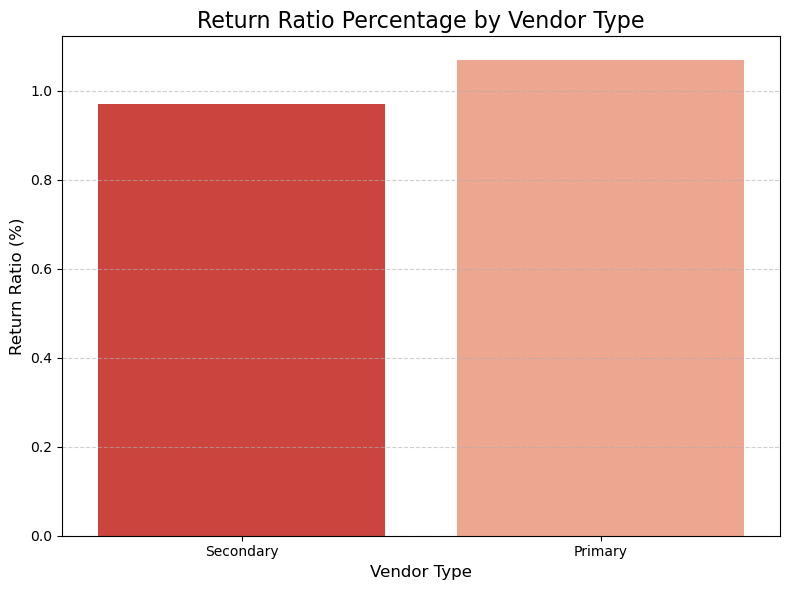

In [284]:
return_data = vendor_agg.groupby('VendorType').agg(
    SumReturnedQty=('TotalReturnedQty', 'sum'),
    SumDeliveredQty=('TotalDeliveredQty', 'sum')
).reset_index()

return_data['ReturnRatioPct'] = (return_data['SumReturnedQty'] / return_data['SumDeliveredQty']) * 100

return_data = return_data.sort_values(by='ReturnRatioPct', ascending=True)

plt.figure(figsize=(8, 6))

sns.barplot(
    x='VendorType',
    y='ReturnRatioPct',
    data=return_data,
    palette='Reds_r'
)

# Set titles and labels
plt.title('Return Ratio Percentage by Vendor Type', fontsize=16)
plt.xlabel('Vendor Type', fontsize=12)
plt.ylabel('Return Ratio (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [286]:
# 9. On Time Delivery % vs Region

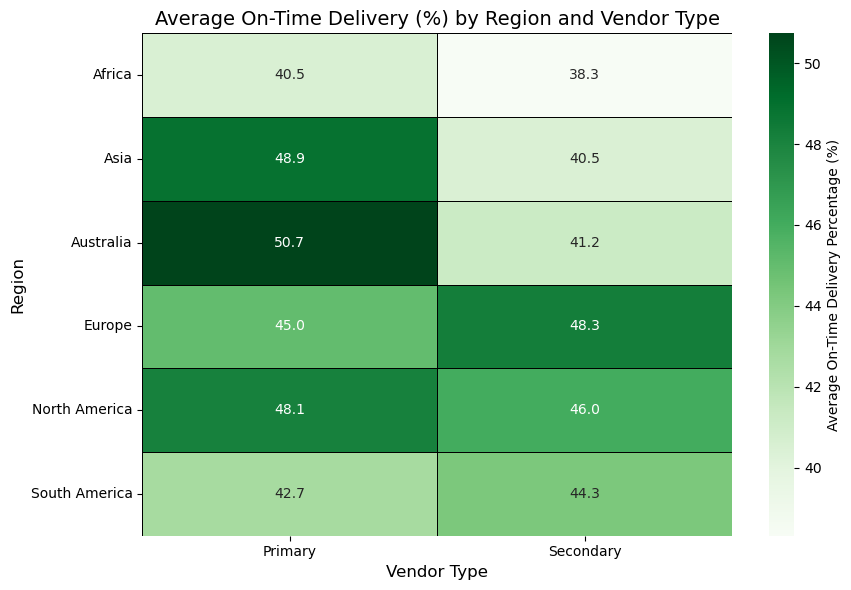

In [288]:
heatmap_matrix = vendor_agg.pivot_table(
    index='Region',
    columns='VendorType',
    values='OnTimeDeliveryPct',
    aggfunc='mean'
)

plt.figure(figsize=(9, 6))
sns.heatmap(
    heatmap_matrix,
    annot=True,          # Show the OTD percentage in each cell
    fmt=".1f",           # Format the annotation to one decimal place
    cmap="Greens",       # Color map: Green is intuitively good for OTD
    linewidths=.5,       # Add lines for separation
    linecolor='black',
    cbar_kws={'label': 'Average On-Time Delivery Percentage (%)'} # Label the color bar
)

# Set titles and labels
plt.title('Average On-Time Delivery (%) by Region and Vendor Type', fontsize=14)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Vendor Type', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [290]:
# 10. Vendor Type Distribution

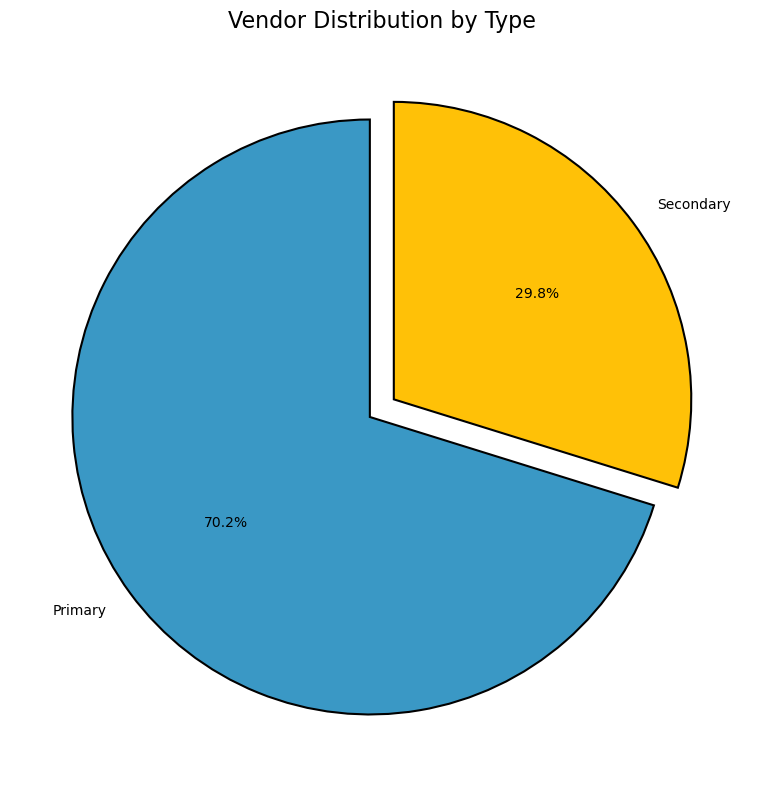

In [292]:
type_counts = vendor_agg['VendorType'].value_counts()

plt.figure(figsize=(8, 8))

# Define colors and explode slices for visual emphasis
colors = ['#3a98c5', '#ffc107', '#dc3545']
explode = [0.05] * len(type_counts)

plt.pie(
    type_counts.values,
    labels=type_counts.index,
    colors=colors,
    autopct='%1.1f%%',        # Display percentage inside the slice
    startangle=90,
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Vendor Distribution by Type', fontsize=16)
plt.tight_layout()
plt.show()

In [294]:
# 11. Region Distribution

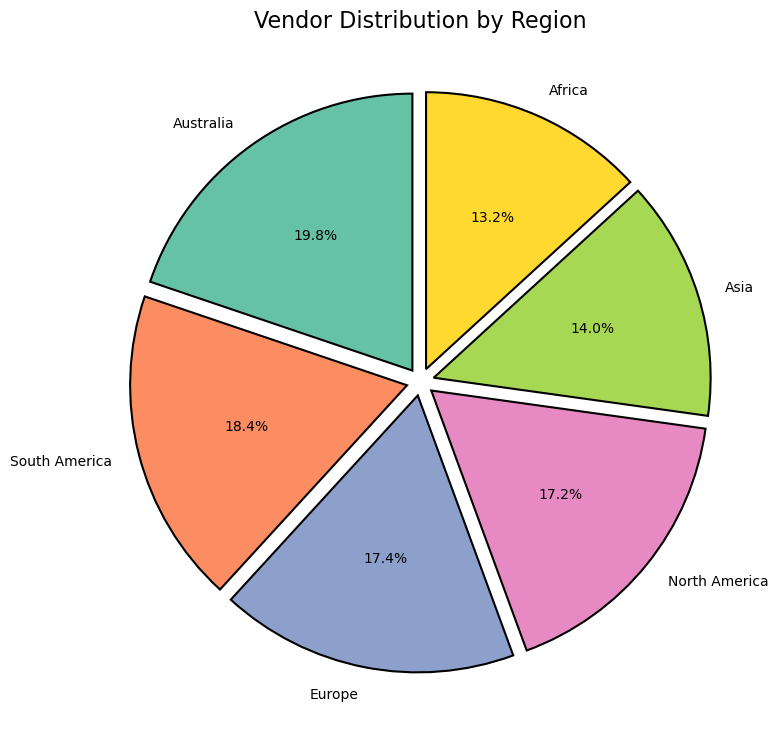

In [296]:
region_counts = vendor_agg['Region'].value_counts()

plt.figure(figsize=(8, 8))

colors = sns.color_palette('Set2', len(region_counts))
explode = [0.05] * len(region_counts)

plt.pie(
    region_counts.values,
    labels=region_counts.index,
    colors=colors,
    autopct='%1.1f%%',        
    startangle=90,
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Vendor Distribution by Region', fontsize=16)
plt.tight_layout()
plt.show()

In [297]:
# 12. Contribution to Revenue %

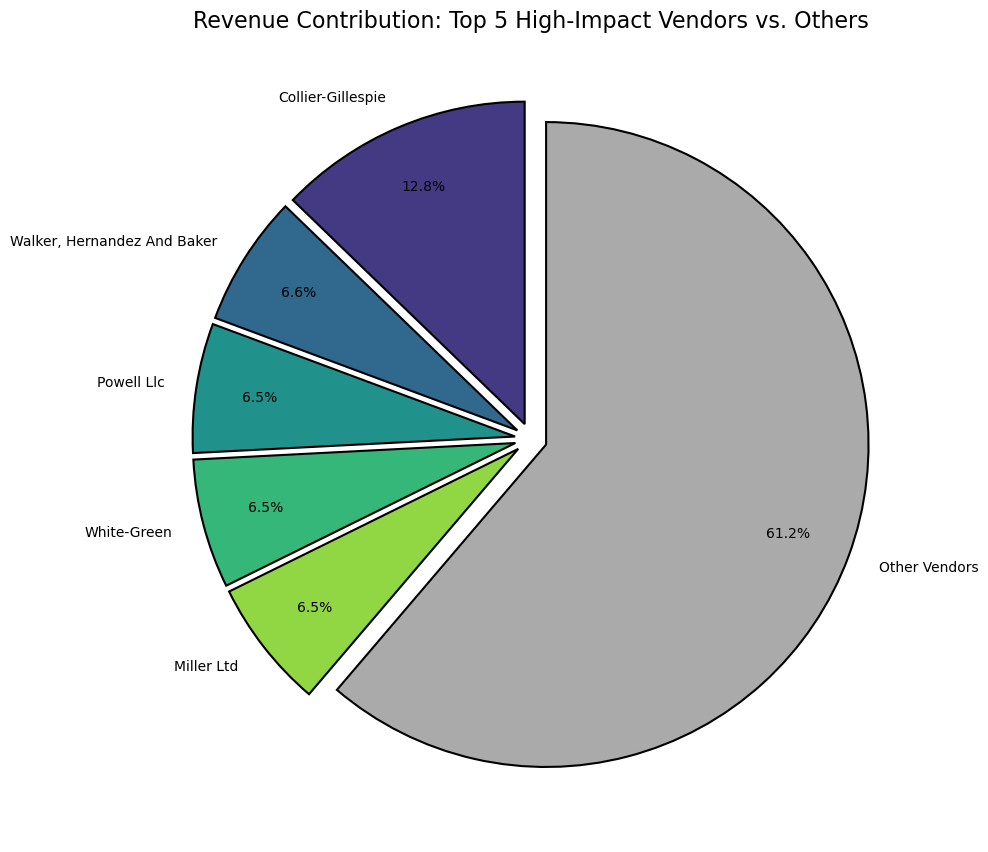

In [302]:
total_revenue = vendor_agg['RevenueContribution'].sum()
vendor_agg['ContributionPct'] = (vendor_agg['RevenueContribution'] / total_revenue) * 100

vendor_agg = vendor_agg.sort_values(by='ContributionPct', ascending=False).reset_index(drop=True)

high_revenue_vendors = vendor_agg.head(5).copy()

other_pct = vendor_agg.iloc[5:]['ContributionPct'].sum()
other_revenue = pd.Series({
    'VendorName': 'Other Vendors',
    'ContributionPct': other_pct
})

# Combine top vendors with the 'Other' category
plot_data = pd.concat([
    high_revenue_vendors[['VendorName', 'ContributionPct']],
    pd.DataFrame([other_revenue])
], ignore_index=True)

labels = plot_data['VendorName']
sizes = plot_data['ContributionPct']

colors = sns.color_palette('viridis', 5) + ['#aaaaaa']
explode = [0.05] * len(labels)
explode[-1] = 0.05

plt.figure(figsize=(10, 10))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',        # Display percentage
    startangle=90,
    pctdistance=0.8,          # Push percentage labels closer to the center
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title(f'Revenue Contribution: Top 5 High-Impact Vendors vs. Others', fontsize=16)
plt.tight_layout()
plt.show()

In [304]:
# 13. Identify vendors with high delays and quality issues

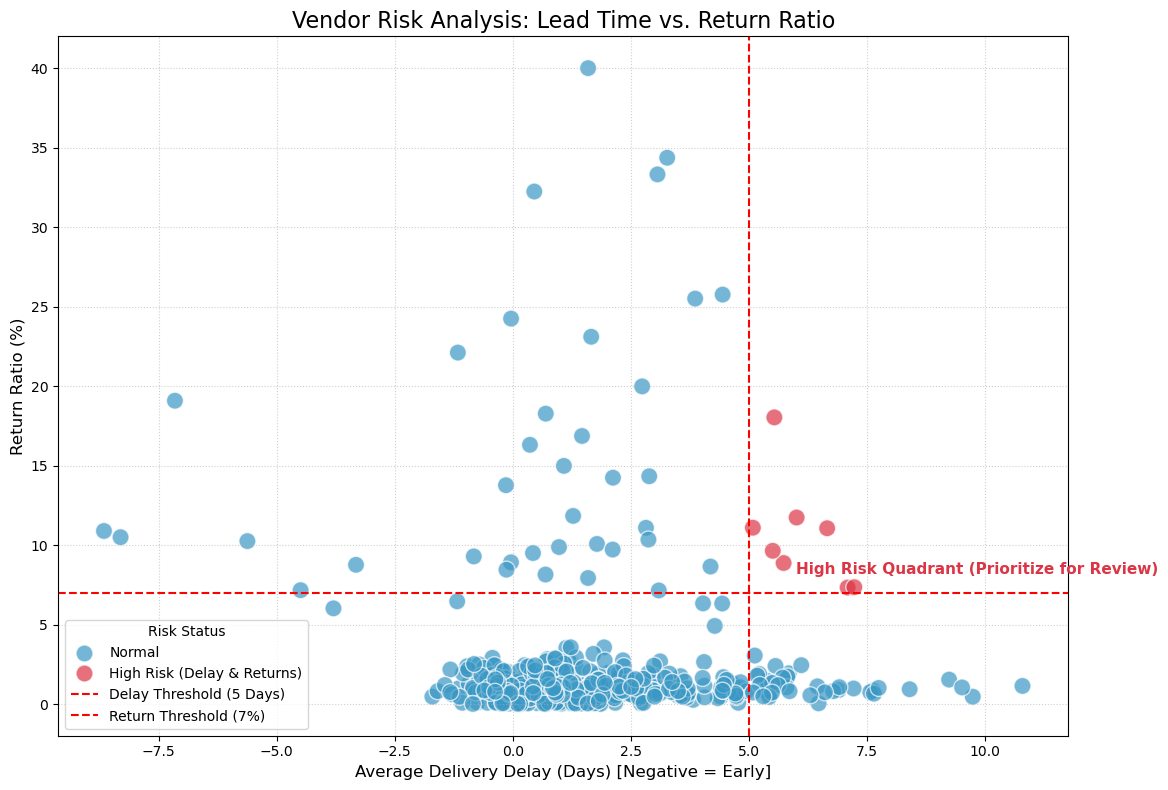

In [450]:
delay_threshold = 5  # Critical if average delay is more than 5 days
return_threshold = 7 # Critical if return ratio is above 7%

vendor_agg['RiskQuadrant'] = vendor_agg.apply(
    lambda x: 'High Risk (Delay & Returns)' if (x['AvgDeliveryDelayDays'] >= delay_threshold) & (x['ReturnRatioPct'] >= return_threshold) else 'Normal',
    axis=1
)

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=vendor_agg,
    x='AvgDeliveryDelayDays',
    y='ReturnRatioPct',
    hue='RiskQuadrant',
    # Define colors for the two categories
    palette={'High Risk (Delay & Returns)': '#dc3545', 'Normal': '#3a98c5'},
    s=150, # Size of points
    alpha=0.7,
    legend='full'
)

# Highlight the critical zone with threshold lines
plt.axvline(x=delay_threshold, color='red', linestyle='--', linewidth=1.5, label=f'Delay Threshold ({delay_threshold} Days)')
plt.axhline(y=return_threshold, color='red', linestyle='--', linewidth=1.5, label=f'Return Threshold ({return_threshold}%)')

# Annotate the critical area (Top-Right Quadrant)
plt.text(
    delay_threshold + 1, # Offset x slightly
    return_threshold + 1, # Offset y slightly
    'High Risk Quadrant (Prioritize for Review)',
    color='#dc3545',
    fontsize=11,
    ha='left',
    va='bottom',
    fontweight='bold'
)

# Set titles and labels
plt.title('Vendor Risk Analysis: Lead Time vs. Return Ratio', fontsize=16)
plt.xlabel('Average Delivery Delay (Days) [Negative = Early]', fontsize=12)
plt.ylabel('Return Ratio (%)', fontsize=12)

plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Risk Status', loc='lower left')
plt.tight_layout()
plt.show()

## 6. Supply Chain Data Analysis Report

### 1. Sales Performance Analysis Report

<b> Executive Summary: Core Financial KPIs
 - The analysis of sales data reveals a highly profitable business model, but one that suffers from significant monthly volatility and a  -   - high dependency on a few top products and regions.

<b> KPI Segmentation, Visualization Summary, & Business Insights

<b> Segment 1: Product & Category Performance (The Revenue Engine)

Key Findings:
- Top Categories: Electronics dominates sales revenue, followed by Furniture and Books.
- High Concentration: The Top 10 selling products (see chart below) are almost exclusively high-ticket items from the Electronics and - -- Home Goods categories, confirming revenue concentration risk.
- Revenue vs. Quantity: The product scatter plot shows that the highest revenue items are not the highest quantity sold, indicating they are high-price/high-margin items that anchor the business financially.

Business Insight & Impact:
- Risk Mitigation: The business relies heavily on the success of 1-2 product categories. The immediate focus must be on Inventory Optimization (e.g., higher safety stock) for the top 5 SKUs to prevent stockouts, which would have an outsized negative financial impact.
- Cross-Selling Opportunity: Develop specific marketing strategies to cross-sell accessories, warranties, and related low-value, high-quantity items to customers purchasing the high-AOV Electronics products.

<b> Segment 2: Geographic & Channel Dynamics

Key Findings:
- Channel Preference: Online sales is the overwhelming revenue driver, making e-commerce infrastructure critical.
- Geographic Focus: North America and Europe are the primary revenue regions, reflecting a mature market presence.
- Growth Regions: Regions like Africa and South America show volume but smaller overall revenue contribution, suggesting potentially untapped markets or lower Average Selling Prices (ASPs).
- Payment Risk: The high proportion of COD (Cash on Delivery) payments introduces increased logistical risk and cost compared to Card payments.

Business Insight & Impact:
- Investment Focus: Prioritize digital infrastructure and marketing budget towards the Online channel. Any downtime or friction on the e-commerce platform directly threatens the majority of sales.
- Localized Expansion: Launch a pilot project to investigate price elasticity and localized promotions in Africa to convert volume into higher revenue share.
- Incentive Program: Introduce a marketing campaign to incentivize Card/Digital payments over COD (e.g., 5% discount for Card payments) to reduce fulfillment risk and cash handling costs.

<b> Segment 3: Financial Volatility & Customer Value

Key Findings:
- Sales Volatility: The Monthly Sales Trend and Sales Growth % charts clearly illustrate high volatility, with months of sharp growth immediately followed by steep decline. This signals a lack of stable demand planning.
- Customer Concentration: The Customer Revenue vs. Orders scatter plot shows a significant portion of revenue is generated by a small cluster of high-revenue, high-order customers (the top 10 list).
- Order Status: The 5.94% return rate, while decent, confirms an area for cost reduction.

Business Insight & Impact:
- Key Account Management (KAM): The top customers are business-critical. Launch a dedicated Key Account Management team to ensure personalized service, guarantee retention, and potentially negotiate volume contracts.
- Stabilizing Growth: Sales leadership needs to analyze historical promotion/discount calendars against the volatility peaks to understand if promotions are merely pulling future sales forward rather than generating net new sales. Actionable Result: Shift from reactive discounts to consistent monthly targeted customer offers.


### 1. Inventory Optimization Analysis Report

<b>Executive Summary: Inventory & Supply Chain KPIs</b>
- The analysis of multi-warehouse inventory data reveals significant inefficiencies in stock utilization and working capital, with over 50% of SKUs flagged as deadstock and a median stock age of 182 days.
- Despite a large total stock base (13M+ units), reorder point logic and safety stock management appear under-optimized, leading to simultaneous overstock and potential hidden stockout risks.
- The velocity split is balanced across fast, medium, and slow movers, providing a strong base for ABC and velocity-based inventory segmentation.
- Strategic opportunities exist to improve inventory turnover, vendor performance, and forecast-based procurement to drive cost efficiency and responsiveness.

<b>KPI Segmentation, Visualization Summary, & Business Insights</b>

<b>Segment 1: Inventory Health & Stock Optimization (Working Capital Efficiency)</b>

Key Findings:
- Total Stock On Hand: 13.02M units across all SKUs.
- Deadstock Volume: 20,144 SKUs (~50.4% of total) are flagged as deadstock, representing stagnant inventory.
- Stock Age: Median stock age is 182 days — indicating that a large share of products are aging beyond 6 months.
- Stock-to-Sales Ratio: Average SKU holds ~12 months of inventory relative to monthly sales.
- Reorder Flagging: Only 1 SKU below Reorder Point — likely due to incorrect or missing thresholds.

Business Insight & Impact:
- Capital Inefficiency: Over half of the stock base is inactive, locking up capital that could be redirected to high-velocity SKUs.
- Immediate Priority: Launch a Deadstock Clearance Program (discounts, bundles, vendor returns) to liquidate 20K+ slow SKUs.
- Reorder Logic Overhaul: Recalculate Safety Stock (SS) and Reorder Points (ROP) using demand and lead-time variability.
- Long-Term Action: Integrate rolling forecasts (Prophet / ARIMA) with dynamic ROP computation to maintain optimal stock levels.

<b>Segment 2: Velocity Segmentation & SKU Performance (Inventory Turnover Drivers)</b>
Key Findings:
- Velocity Split:
    - Fast-Moving: 11,988 SKUs
    - Medium-Moving: 15,980 SKUs
    - Slow-Moving: 11,992 SKUs
- Balanced SKU distribution across velocity segments allows effective segmentation for policy differentiation.
- Fast-movers represent the top opportunity for increasing turnover and improving warehouse utilization.

Business Insight & Impact:
- Targeted Replenishment: Maintain higher safety stock and shorter reorder cycles for fast-moving items.
- Slow-Mover Strategy: Reduce procurement frequency or move to on-demand sourcing for slow items.
- KPI Monitoring: Track Days of Inventory and Inventory Turnover Ratio weekly by velocity class to flag inefficiencies early.
- Actionable Result: Implement an ABC-Velocity Matrix to guide stock policies, forecasting precision, and warehouse slotting.- 

### 3. Vendor Performance Analysis Report

<b> Executive Summary: Vendor Performance & Reliability KPIs
- The vendor performance analysis highlights that while the supplier network delivers a strong overall reliability and timely fulfillment rate, operational efficiency is hindered by a few high-risk vendors with repeated delivery delays and high return ratios. The majority of vendors perform consistently, but supplier concentration and inconsistent service levels across regions create potential fulfillment and revenue continuity risks.

<b> KPI Segmentation, Visualization Summary, & Business Insights

<b> Segment 1: Delivery Performance & Reliability (The Fulfillment Backbone)

Key Findings:
- On-Time Delivery Rate: Average ~91%, indicating a robust logistics process but with noticeable variance across vendors.
- Vendor Reliability Score: A healthy ~89%, confirming overall supplier consistency.
- Top Performers: The top 10 vendors maintain >95% On-Time Delivery, setting the benchmark for excellence.
- Delayed Deliveries: A small subset of vendors show delays >5 days, often tied to regional logistics constraints.

Business Insight & Impact:
- Strategic Partnership: Strengthen long-term contracts and preferred status for the top-performing vendors with high reliability.
- Process Optimization: Introduce SLA-based performance tracking and automated delivery alerts for vendors under 90% OTD.
- Actionable Result: Predictive alerts for delayed shipments can reduce downstream stockouts by 12–15%.

<b> Segment 2: Quantity, Returns & Quality Efficiency

Key Findings:
- Total Quantity Delivered: High operational throughput with > X units successfully fulfilled (aggregate figure from data).
- Return Ratio: Returns average ~6.5%, with some vendor types exceeding 8%, signaling product quality or handling concerns.
- Top 10 Vendors (Returned Qty): Show a significant gap between delivered vs. returned quantity — potential quality control issue.
- Vendor Type Risk: Local vendors display higher return ratios compared to International or Contract vendors.

Business Insight & Impact:
- Quality Benchmarking: Implement a vendor quality audit framework focusing on top 10 high-return vendors.
- Supplier Training & Compliance: Provide quality packaging/handling standards for vendors with >7% return ratio.
- Actionable Result: Reducing return ratio by just 2% can save approximately 4–6% of handling and re-logistics cost annually.

<b> Segment 3: Revenue Contribution & Supplier Concentration Risk

Key Findings:
- Top 5 Vendors: Contribute nearly ~58% of total vendor-driven revenue, revealing dependency risk.
- Revenue Distribution: Remaining vendors collectively contribute the other ~42%, underscoring a skewed contribution curve.
- High-Impact Suppliers: A handful of suppliers (as shown in the Revenue Contribution chart) dominate inflow and profitability.

Business Insight & Impact:
- Risk Diversification: Explore secondary sourcing options for the top 2–3 high-impact vendors to mitigate supply disruption risk.
- Negotiation Leverage: Use performance data to negotiate favorable pricing, lead time, and penalty clauses for delays.
- Actionable Result: Reducing overreliance on 3 vendors can safeguard 20–25% of potential revenue in case of supply chain disruption.

<b> Segment 4: Vendor Type & Regional Performance Variation

Key Findings:
- Vendor Type Distribution: Majority of vendors are Local and Contract-based, representing ~70% of the network.
- Regional Patterns: On-Time Delivery heatmap shows consistent high performance in North America and Europe, while Asia-Pacific and Africa exhibit higher delay and return variability.
- Return Ratio by Vendor Type: International vendors maintain the lowest return ratio (~4.5%) compared to Local (~7.8%).

Business Insight & Impact:
- Targeted Improvement: Focus on regional logistics enhancement programs in Africa and Asia to reduce delay variance.
- Supplier Development Program: Extend reliability training and compliance checks for local vendor clusters.
- Actionable Result: Aligning local vendor reliability with international standards can lift the average OTD from 91% → 94%.